In [1]:
import pandas as pd

# Replace the file path with your actual file location
df = pd.read_csv('/content/online_retail_II.csv')


In [2]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [3]:
df.shape

(61404, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61404 entries, 0 to 61403
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      61404 non-null  object 
 1   StockCode    61404 non-null  object 
 2   Description  61085 non-null  object 
 3   Quantity     61403 non-null  float64
 4   InvoiceDate  61403 non-null  object 
 5   Price        61403 non-null  float64
 6   Customer ID  42044 non-null  float64
 7   Country      61403 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.7+ MB


In [5]:
print("Column names:\n", df.columns.tolist())


Column names:
 ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


In [6]:
# Total missing values per column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Invoice            0
StockCode          0
Description      319
Quantity           1
InvoiceDate        1
Price              1
Customer ID    19360
Country            1
dtype: int64


In [7]:
# Check for fully duplicated rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 647


In [8]:
df[df.duplicated()]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1.0,01-12-2009 11:34,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6.0,01-12-2009 11:34,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12.0,01-12-2009 11:34,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1.0,01-12-2009 11:34,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1.0,01-12-2009 11:34,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
60572,494787,22054,MINI CAKE STAND HANGING HEARTS,1.0,18-01-2010 13:34,1.65,15164.0,United Kingdom
60709,494797,21730,GLASS STAR FROSTED T-LIGHT HOLDER,1.0,18-01-2010 14:23,4.95,18036.0,United Kingdom
60743,494798,84948,SILVER HANGING T-LIGHT HOLDER DOME,6.0,18-01-2010 14:32,1.65,17773.0,United Kingdom
60805,494803,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,1.0,18-01-2010 15:03,2.55,15005.0,United Kingdom


In [9]:
df = df.drop_duplicates()


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')  # handles bad formats


In [11]:
invalid_dates = df['InvoiceDate'].isna().sum()
print("Rows with invalid date format:", invalid_dates)


Rows with invalid date format: 26712


In [12]:
# View total missing values by column
missing = df[['Invoice', 'Customer ID', 'InvoiceDate', 'Quantity', 'Price']].isnull().sum()
print("Missing values:\n", missing)


Missing values:
 Invoice            0
Customer ID    19338
InvoiceDate    26712
Quantity           1
Price              1
dtype: int64


In [13]:
df['Description'].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,460
SCOTTIE DOG HOT WATER BOTTLE,289
STRAWBERRY CERAMIC TRINKET BOX,252
HOT WATER BOTTLE TEA AND SYMPATHY,247
BAKING SET 9 PIECE RETROSPOT,220
...,...
BAROQUE BUTTERFLY EARRINGS CRYSTAL,1
CRACKED GLAZE EARRINGS BROWN,1
TURQUOISE HEART OF GLASS BRACELET,1


In [14]:
df.Description=df.Description.fillna('White Hanging Heart T-Light Holder')

In [15]:
df['Customer ID'].value_counts()

,count
Customer ID,
17841.0,699
17850.0,598
14606.0,528
14527.0,520
15311.0,460
...,...
18070.0,1
17531.0,1
15614.0,1


In [16]:
df['Customer ID']=df['Customer ID'].fillna(17841.0)

In [17]:
# Drop fully duplicated rows
df = df.drop_duplicates()


In [18]:
print("Remaining missing values:\n", df.isnull().sum())


Remaining missing values:
 Invoice            0
StockCode          0
Description        0
Quantity           1
InvoiceDate    26711
Price              1
Customer ID        0
Country            1
dtype: int64


In [19]:
# Count fully duplicated rows
duplicate_count = df.duplicated().sum()
print(f"Number of fully duplicate rows: {duplicate_count}")

# Display them (optional)
df[df.duplicated()].head()


Number of fully duplicate rows: 0


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [20]:
df = df.drop_duplicates()


In [21]:
# Check duplicates based on InvoiceNo + CustomerID + Product
subset_duplicates = df.duplicated(subset=['Invoice', 'Customer ID', 'Description'])
print(f"Duplicates based on Invoice, Customer ID, and Description: {subset_duplicates.sum()}")


Duplicates based on Invoice, Customer ID, and Description: 608


In [22]:
df = df.drop_duplicates(subset=['Invoice', 'Customer ID', 'Description'])


In [23]:
print("Any duplicates left?", df.duplicated().any())


Any duplicates left? False


In [24]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Optional: Extract useful features from the date
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')

In [25]:
# Check data types
print(df[['Quantity', 'Price']].dtypes)

# Convert to numeric if needed (sometimes read as object)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


Quantity    float64
Price       float64
dtype: object


In [26]:
# Revenue = Quantity × UnitPrice
df['Revenue'] = df['Quantity'] * df['Price']


In [27]:
# Standardize product descriptions (lowercase, strip whitespace)
df['Description'] = df['Description'].str.lower().str.strip()

# Convert to category type if useful for memory & grouping
df['Country'] = df['Country'].astype('category')
df['Description'] = df['Description'].astype('category')


In [28]:
df.dtypes


,0
Invoice,object
StockCode,object
Description,category
Quantity,float64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,category
Year,float64
Month,float64


In [29]:
# Strip whitespace, make lowercase, and standardize product descriptions
df['Description'] = df['Description'].str.strip().str.lower()

# Optional: remove special characters (if necessary)
df['Description'] = df['Description'].str.replace(r'[^\w\s]', '', regex=True)


In [30]:
# Check for invalid entries
print("Invalid Quantities:\n", df[df['Quantity'] <= 0].shape[0])
print("Invalid Prices:\n", df[df['Price'] <= 0].shape[0])

# Remove them
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


Invalid Quantities:
 1439
Invalid Prices:
 351


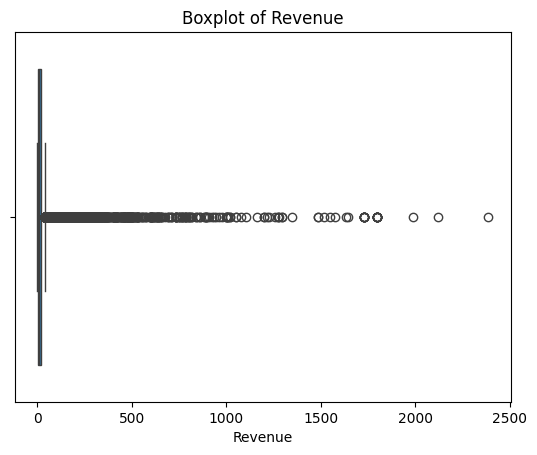

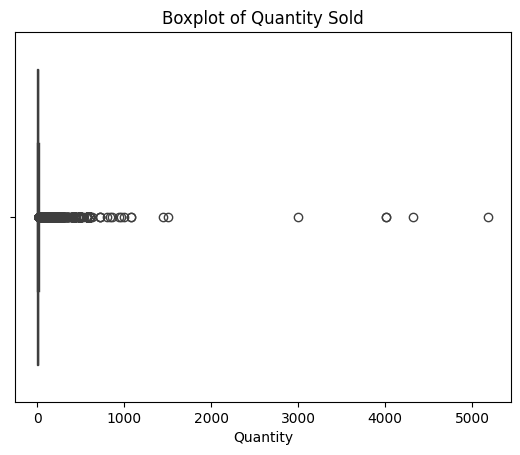

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue
sns.boxplot(x=df['Revenue'])
plt.title('Boxplot of Revenue')
plt.show()

# Quantity
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity Sold')
plt.show()


In [32]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers
revenue_outliers = detect_outliers_iqr(df, 'Revenue')
quantity_outliers = detect_outliers_iqr(df, 'Quantity')

print(f"Revenue outliers: {len(revenue_outliers)}")
print(f"Quantity outliers: {len(quantity_outliers)}")


Revenue outliers: 5139
Quantity outliers: 6124


In [33]:
# Cap outliers at 1st and 99th percentiles
q_low = df['Revenue'].quantile(0.01)
q_high = df['Revenue'].quantile(0.99)
df['Revenue'] = df['Revenue'].clip(q_low, q_high)


In [34]:
# Cap outliers at 1st and 99th percentiles
q_low = df['Quantity'].quantile(0.01)
q_high = df['Quantity'].quantile(0.99)
df['Quantity'] = df['Quantity'].clip(q_low, q_high)


In [35]:
df['Revenue'] = df['Quantity'] * df['Price']


In [36]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract date-based features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')

In [37]:
# Save the cleaned dataset
df.to_csv('cleaned_ecommerce_data.csv', index=False)


In [38]:
# Load and keep original for reference (if not already)
df_raw = pd.read_csv('/content/online_retail_II.csv')


In [39]:
# Total revenue by Month-Year
monthly_revenue = df.groupby('Month_Year')['Revenue'].sum().reset_index()

# Sort chronologically
monthly_revenue['Month_Year'] = monthly_revenue['Month_Year'].astype(str)
monthly_revenue = monthly_revenue.sort_values('Month_Year')


In [40]:
# Best-performing month
best_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]

# Worst-performing month
worst_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]


In [41]:
print(f"Best Month: {best_month['Month_Year']} - Revenue: ₹{best_month['Revenue']:.2f}")
print(f"Worst Month: {worst_month['Month_Year']} - Revenue: ₹{worst_month['Revenue']:.2f}")


Best Month: 2009-02 - Revenue: ₹57871.26
Worst Month: 2010-06 - Revenue: ₹7832.94


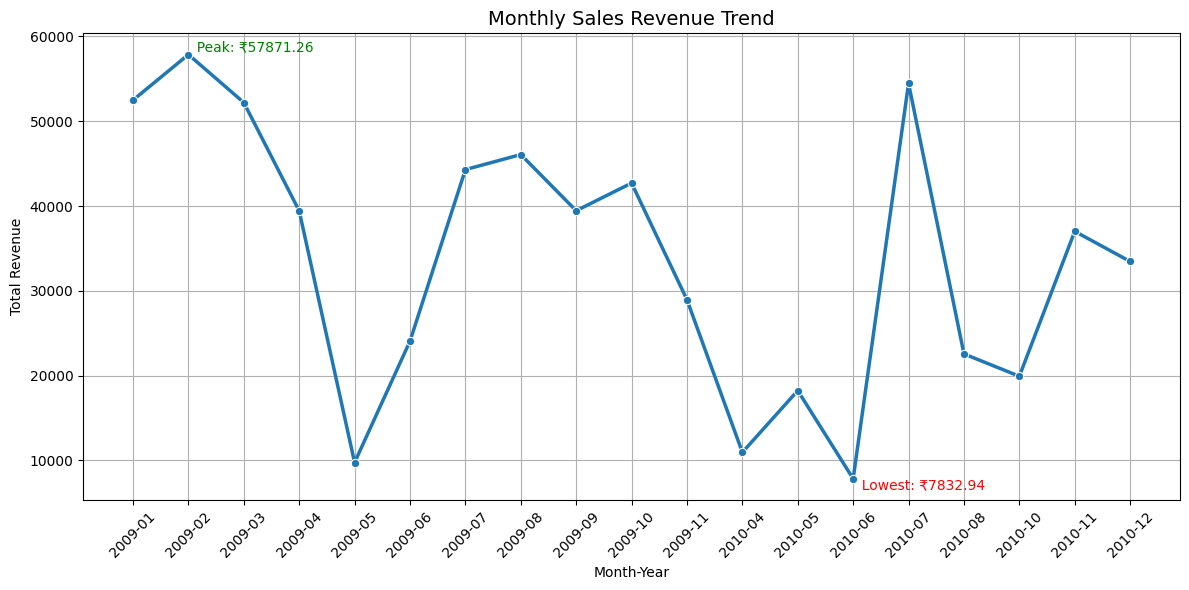

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Month_Year is string type and sorted
monthly_revenue['Month_Year'] = monthly_revenue['Month_Year'].astype(str)
monthly_revenue = monthly_revenue.sort_values('Month_Year')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='Month_Year', y='Revenue', marker='o', linewidth=2.5)
plt.title('Monthly Sales Revenue Trend', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Annotate highest and lowest month
max_rev = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]
min_rev = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]

plt.text(max_rev['Month_Year'], max_rev['Revenue'], f"  Peak: ₹{max_rev['Revenue']:.2f}", color='green', ha='left', va='bottom')
plt.text(min_rev['Month_Year'], min_rev['Revenue'], f"  Lowest: ₹{min_rev['Revenue']:.2f}", color='red', ha='left', va='top')

plt.show()

In [43]:
# Ensure date column is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract year and group by it
df['Year'] = df['InvoiceDate'].dt.year
yearly_revenue = df.groupby('Year')['Revenue'].sum().reset_index()


/tmp/ipython-input-44-3270248750.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_revenue, x='Year', y='Revenue', palette='Blues_d')


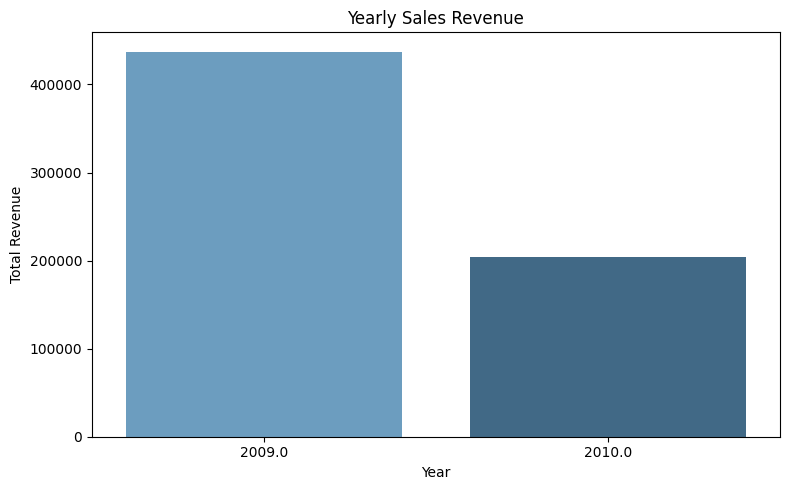

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_revenue, x='Year', y='Revenue', palette='Blues_d')
plt.title('Yearly Sales Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


In [45]:
# Highest revenue month
peak_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]

# Lowest revenue month
low_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]

print(f"Peak Month: {peak_month['Month_Year']} — Revenue: ₹{peak_month['Revenue']:.2f}")
print(f"Lowest Month: {low_month['Month_Year']} — Revenue: ₹{low_month['Revenue']:.2f}")


Peak Month: 2009-02 — Revenue: ₹57871.26
Lowest Month: 2010-06 — Revenue: ₹7832.94


In [46]:
# Total returns by month
df['Returns'] = df['Quantity'] < 0
monthly_returns = df[df['Returns']].groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum().reset_index()
monthly_returns.columns = ['Month_Year', 'Return_Revenue']


In [47]:
comparison = pd.merge(monthly_revenue, monthly_returns, on='Month_Year', how='left').fillna(0)
comparison['Net_Revenue'] = comparison['Revenue'] + comparison['Return_Revenue']


In [48]:
df['Revenue'] = df['Quantity'] * df['Price']


In [49]:
# Total quantity and revenue per product
product_sales = df.groupby('Description').agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Rank products by revenue
top_products = product_sales.sort_values(by='Total_Revenue', ascending=False)


In [50]:
top_10_products = top_products.head(10)

In [51]:
total_revenue = df['Revenue'].sum()
product_sales['Revenue_%'] = (product_sales['Total_Revenue'] / total_revenue) * 100


In [52]:
print(top_10_products)

                            Description  Total_Quantity  Total_Revenue
843                      dotcom postage            73.0       25091.94
3017  white hanging heart tlight holder          7047.0       19225.93
1829      paper chain kit 50s christmas          2749.0        8818.88
2424       scottie dog hot water bottle          1703.0        8472.12
1439         jumbo bag red white spotty          4686.0        8379.70
2267              retro spot cake stand           720.0        8030.06
1376  hot water bottle tea and sympathy          1879.0        7730.37
2998                white cherry lights          1239.0        7469.49
883             edwardian parasol black          1607.0        7410.69
153       assorted colour bird ornament          4013.0        6919.52


In [53]:
df['Month'] = df['InvoiceDate'].dt.month

# Focus only on top products
top_names = top_10_products['Description'].tolist()
seasonal_data = df[df['Description'].isin(top_names)]

# Group by Product & Month
product_monthly = seasonal_data.groupby(['Description', 'Month'])['Revenue'].sum().reset_index()


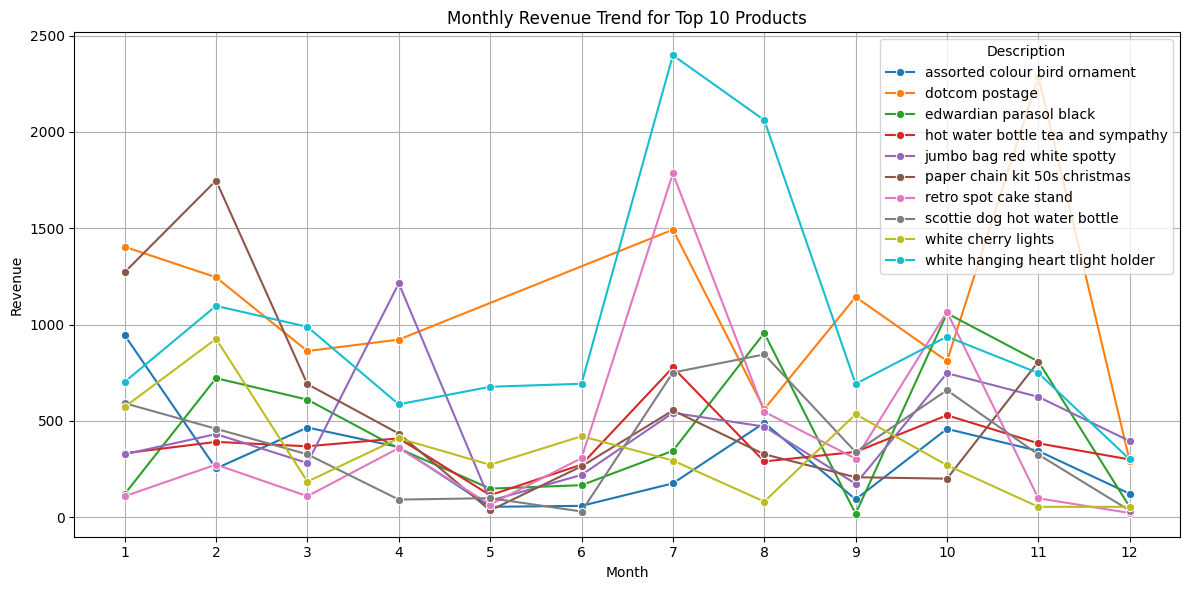

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=product_monthly, x='Month', y='Revenue', hue='Description', marker='o')
plt.title('Monthly Revenue Trend for Top 10 Products')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
low_10_products = product_sales.sort_values(by='Total_Revenue').head(10)


/tmp/ipython-input-56-2232638292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Revenue', y='Description', data=top_10_products, palette='Blues_d')


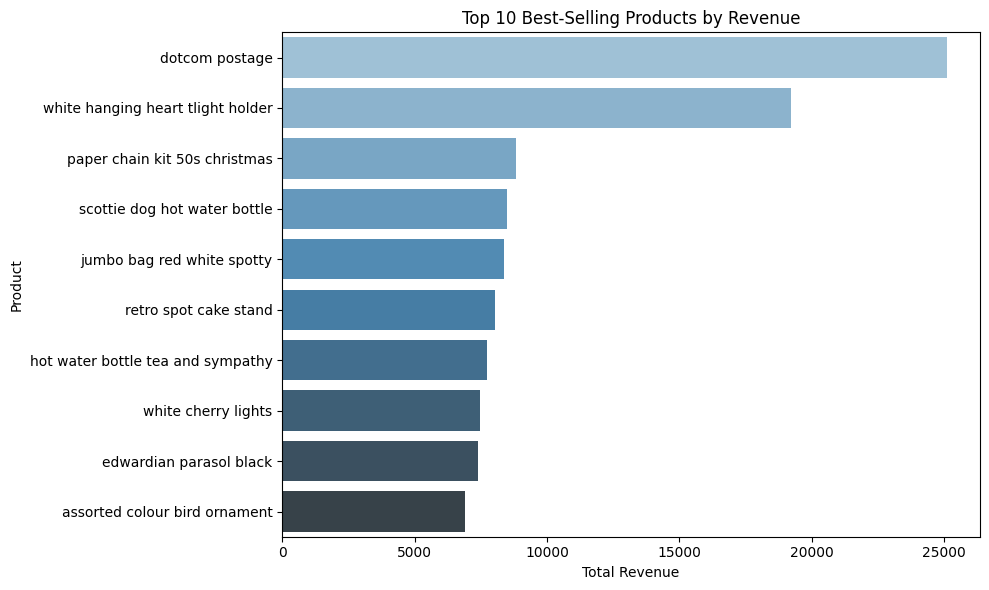

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Revenue', y='Description', data=top_10_products, palette='Blues_d')
plt.title('Top 10 Best-Selling Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [57]:
# If cost price isn't available, estimate it
df['CostPrice'] = df['Price'] * 0.7  # assuming 30% markup


In [58]:
# Revenue and Profit per row
df['Revenue'] = df['Quantity'] * df['Price']
df['Profit'] = df['Quantity'] * (df['Price'] - df['CostPrice'])

# Optional: Profit Margin (%)
df['ProfitMargin'] = (df['Profit'] / df['Revenue']) * 100


In [59]:
profit_analysis = df.groupby('Description').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit_Margin=('ProfitMargin', 'mean'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Sort to find best performers
top_profit_products = profit_analysis.sort_values(by='Total_Profit', ascending=False).head(10)


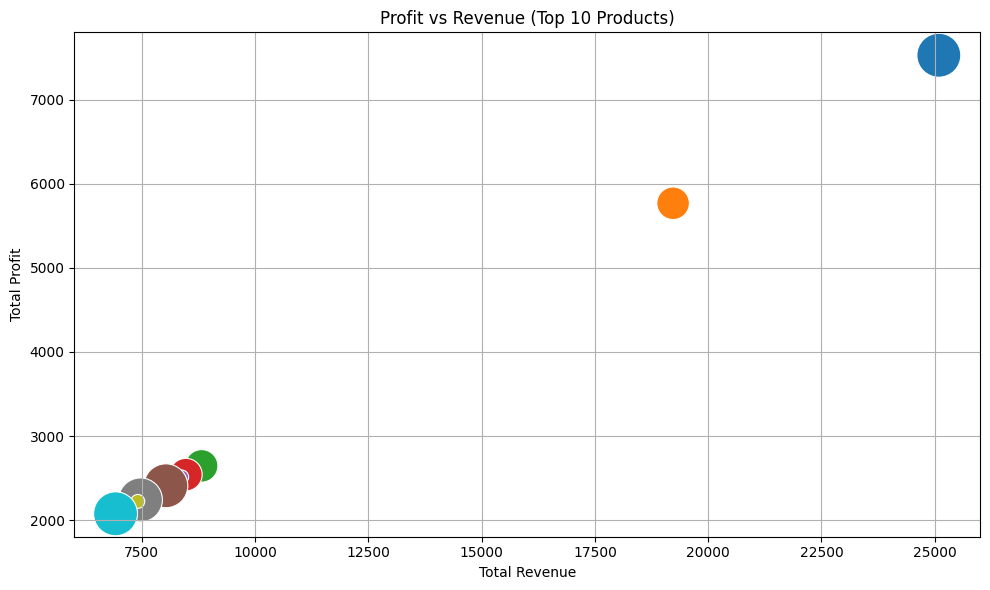

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_profit_products,
    x='Total_Revenue',
    y='Total_Profit',
    size='Average_Profit_Margin',
    hue='Description',
    legend=False,
    sizes=(100, 1000)
)
plt.title('Profit vs Revenue (Top 10 Products)')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
country_sales = df.groupby('Country').agg(
    Total_Orders=('Invoice', 'nunique'),
    Total_Revenue=('Revenue', 'sum')
).reset_index().sort_values(by='Total_Revenue', ascending=False)


/tmp/ipython-input-61-2580291822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_sales = df.groupby('Country').agg(


In [62]:
top_5 = country_sales.head(5)
bottom_5 = country_sales.tail(5)

/tmp/ipython-input-63-2730768256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Revenue', y='Country', data=top_5, palette='Greens_r')


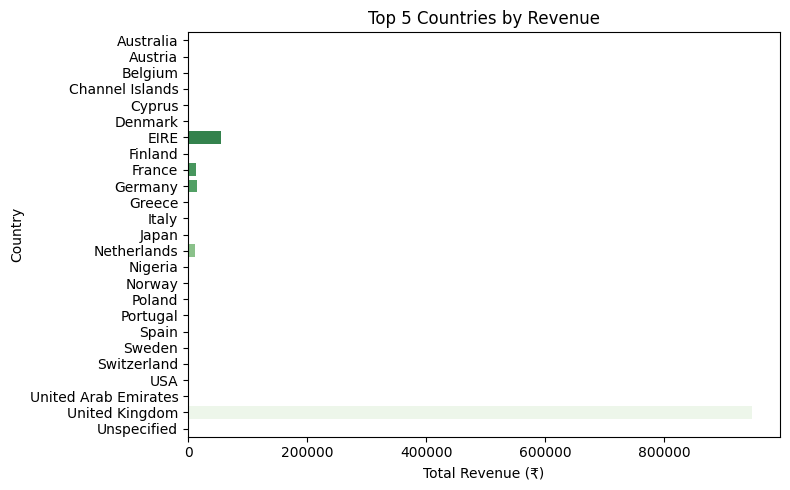

In [63]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Total_Revenue', y='Country', data=top_5, palette='Greens_r')
plt.title('Top 5 Countries by Revenue')
plt.xlabel('Total Revenue (₹)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-4283495757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Revenue', y='Country', data=bottom_5, palette='Reds_r')


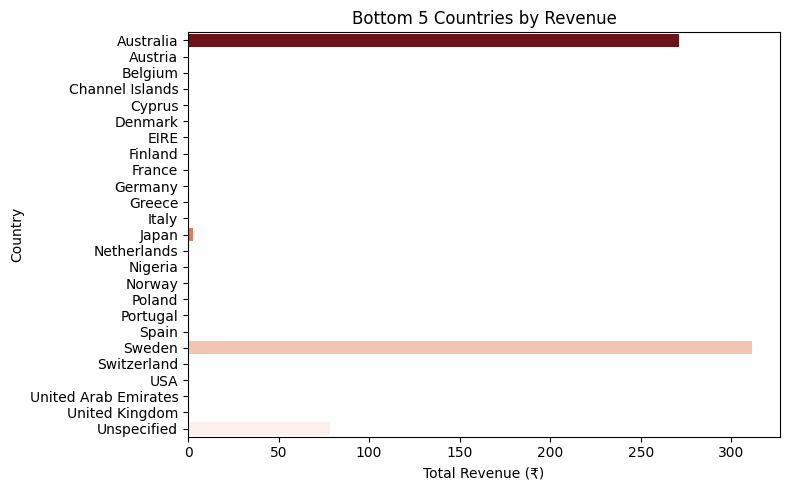

In [64]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Total_Revenue', y='Country', data=bottom_5, palette='Reds_r')
plt.title('Bottom 5 Countries by Revenue')
plt.xlabel('Total Revenue (₹)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [65]:
# Group by Country
country_stats = df.groupby('Country').agg(
    Total_Customers=('Customer ID', 'nunique'),
    Total_Orders=('Invoice', 'nunique'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Calculate metrics
country_stats['Avg_Orders_per_Customer'] = country_stats['Total_Orders'] / country_stats['Total_Customers']
country_stats['Revenue_per_Customer'] = country_stats['Total_Revenue'] / country_stats['Total_Customers']


/tmp/ipython-input-65-2969537734.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_stats = df.groupby('Country').agg(


/tmp/ipython-input-66-3801582795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue_per_Customer', y='Country', data=top_countries, palette='Blues_r')


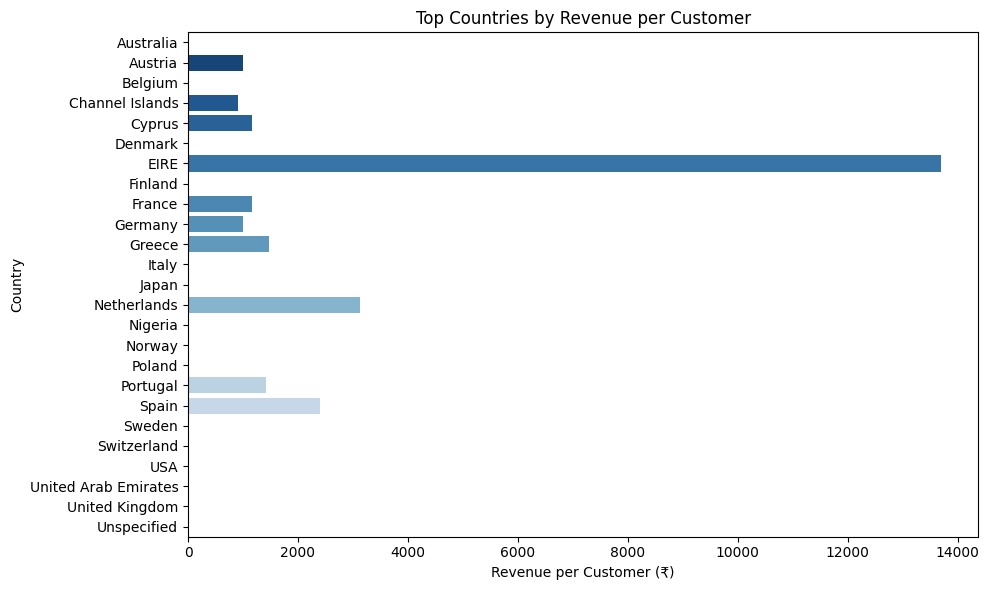

In [66]:
# Top countries by Revenue per Customer
top_countries = country_stats.sort_values(by='Revenue_per_Customer', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue_per_Customer', y='Country', data=top_countries, palette='Blues_r')
plt.title('Top Countries by Revenue per Customer')
plt.xlabel('Revenue per Customer (₹)')
plt.tight_layout()
plt.show()


In [67]:
# Group by Country + Description
country_product_sales = df.groupby(['Country', 'Description']).agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# Top product per country by revenue
top_products = country_product_sales.sort_values(['Country', 'Total_Revenue'], ascending=[True, False])
top_products = top_products.drop_duplicates(subset=['Country'])

# View top 10 country-product pairs
print(top_products[['Country', 'Description', 'Total_Quantity', 'Total_Revenue']].head(10))


               Country                         Description  Total_Quantity  \
1826         Australia           paper bunting retro spots            12.0   
4035           Austria             edwardian parasol black            60.0   
8408           Belgium                             postage            15.0   
12273  Channel Islands     tea time cake stand in gift box            12.0   
12727           Cyprus           antique edwardian dresser             2.0   
18092          Denmark  rotating silver angels tlight hldr           144.0   
20511             EIRE                              manual             4.0   
23957          Finland  pink 3 piece mini dots cutlery set            78.0   
27320           France                             postage            55.0   
30472          Germany                             postage            82.0   

       Total_Revenue  
1826           35.40  
4035          297.00  
8408          340.00  
12273         119.40  
12727          99.90  
180

/tmp/ipython-input-67-1898887278.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_product_sales = df.groupby(['Country', 'Description']).agg(


/tmp/ipython-input-68-1856418011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats.sort_values(by='Total_Orders', ascending=False).head(10),


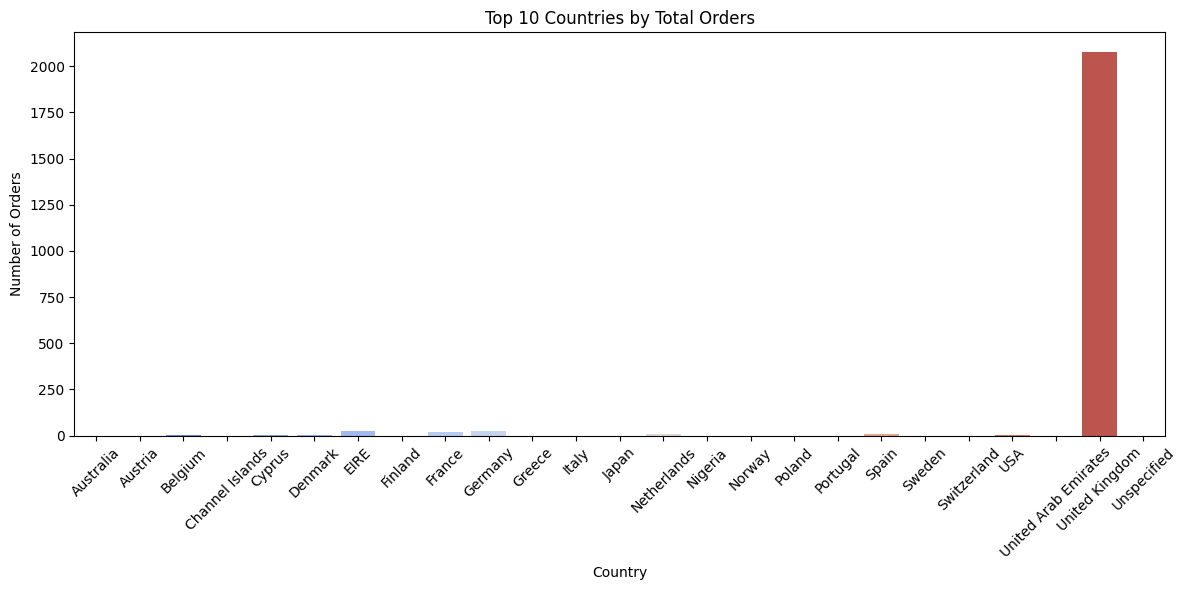

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(data=country_stats.sort_values(by='Total_Orders', ascending=False).head(10),
            x='Country', y='Total_Orders', palette='coolwarm')
plt.title('Top 10 Countries by Total Orders')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [69]:
country_stats = df.groupby('Country').agg(
    Total_Customers=('Customer ID', 'nunique'),
    Total_Orders=('Invoice', 'nunique'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

/tmp/ipython-input-69-914588435.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_stats = df.groupby('Country').agg(


In [70]:
sorted_country_sales = country_stats.sort_values(by='Total_Revenue', ascending=False)

/tmp/ipython-input-71-2792751766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


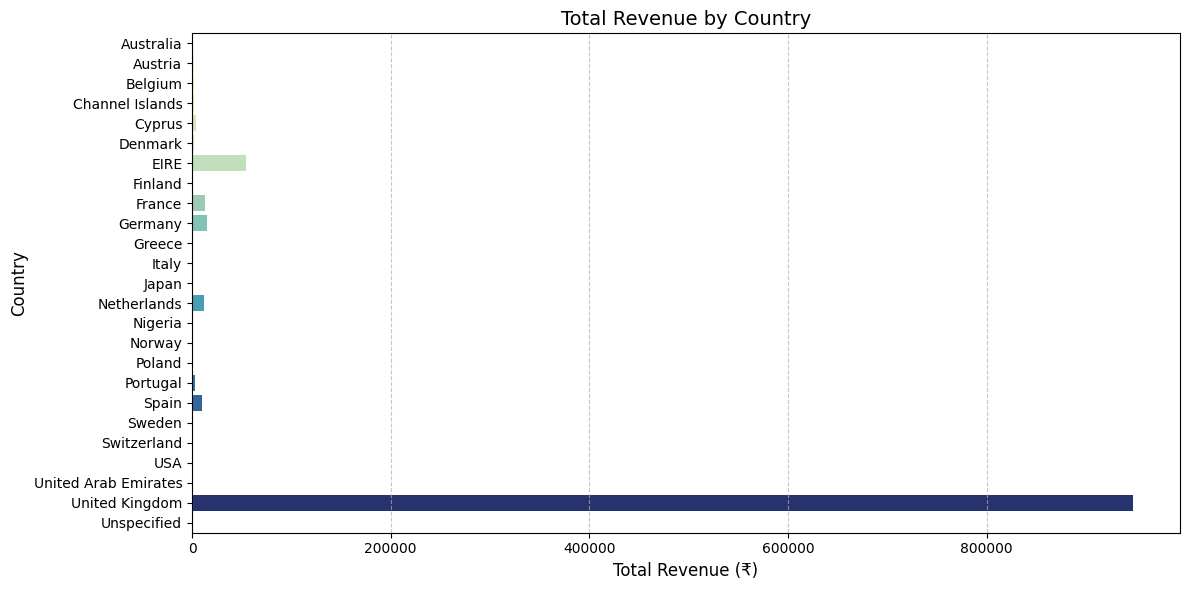

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Total_Revenue',
    y='Country',
    data=sorted_country_sales,
    palette='YlGnBu'
)
plt.title('Total Revenue by Country', fontsize=14)
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
# ✅ Add Population Data (manually sourced for example)
population_data = {
    'Country': [
        'United Kingdom', 'EIRE', 'Germany', 'France', 'Netherlands', 'Sweden',
        'Finland', 'Spain', 'Portugal', 'Italy', 'Austria', 'Belgium', 'Switzerland',
        'Norway', 'Denmark', 'Poland', 'Australia', 'Japan', 'Brazil', 'USA',
        'Canada', 'Israel', 'Cyprus', 'Greece', 'Malta', 'Hong Kong', 'RSA',
        'Singapore', 'Nigeria', 'Bermuda'
    ],
    'Population': [
        67220000, 5050000, 83100000, 68000000, 17400000, 10500000,
        5550000, 47300000, 10300000, 59500000, 9000000, 11600000, 8800000,
        5400000, 5900000, 37800000, 26000000, 125700000, 214000000, 331000000,
        39000000, 9300000, 1240000, 10400000, 516000, 7400000, 60000000,
        5900000, 223000000, 64000
    ]
}
population_df = pd.DataFrame(population_data)

# ✅ Merge Sales with Population
merged = pd.merge(country_sales, population_df, on='Country', how='inner')

# ✅ Compute Revenue per Capita
merged['Revenue_per_Capita'] = merged['Total_Revenue'] / merged['Population']

# ✅ Sort by Penetration (Low to High)
low_penetration = merged.sort_values(by='Revenue_per_Capita').head(10)

/tmp/ipython-input-73-2588498464.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue_per_Capita', y='Country', data=low_penetration, palette='Reds_r')


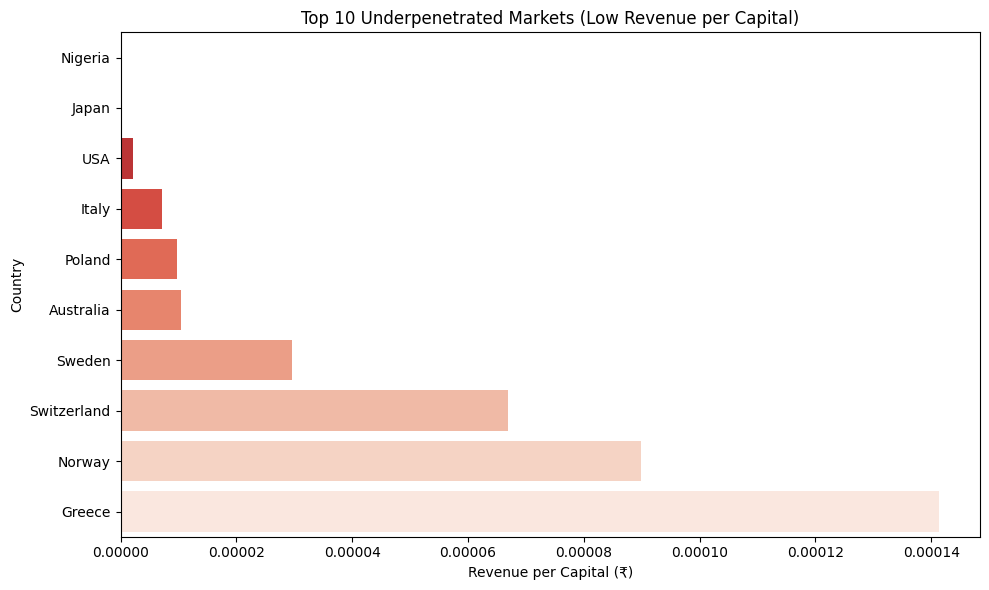

In [73]:
# ✅ Bar Chart: Lowest Revenue per Capita
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue_per_Capita', y='Country', data=low_penetration, palette='Reds_r')
plt.title('Top 10 Underpenetrated Markets (Low Revenue per Capital)')
plt.xlabel('Revenue per Capital (₹)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


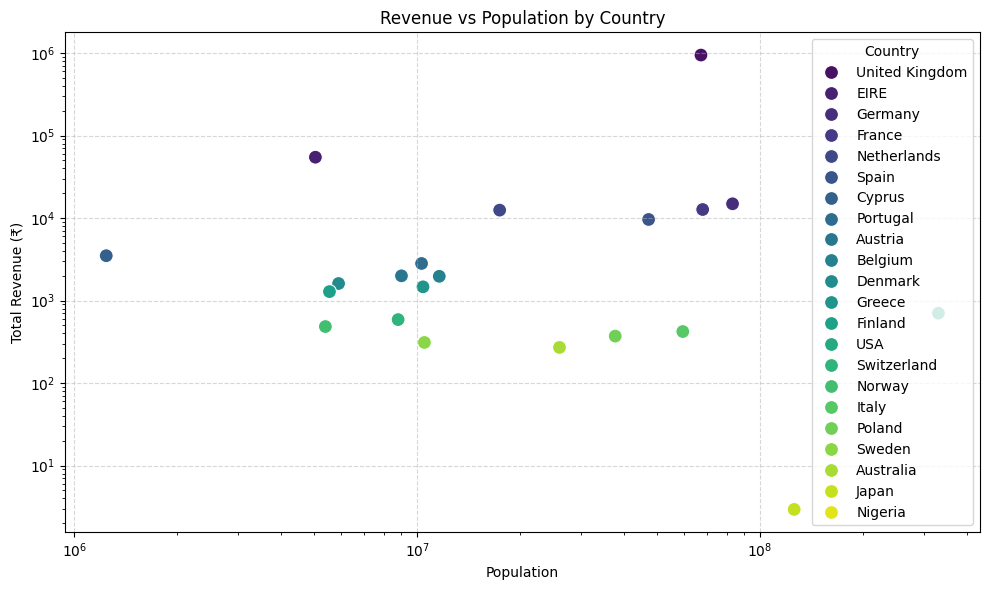

In [74]:
# ✅ Scatter Plot: Population vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='Population', y='Total_Revenue', hue='Country', s=100, palette='viridis')
plt.title('Revenue vs Population by Country')
plt.xlabel('Population')
plt.ylabel('Total Revenue (₹)')
plt.xscale('log')  # optional: makes large differences visible
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [75]:
df['Country_Total_Revenue'] = df.groupby('Country')['Revenue'].transform('sum')

#  Add Product Revenue Insights
df['Product_Total_Revenue'] = df.groupby('Description')['Revenue'].transform('sum')

/tmp/ipython-input-75-255300992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Country_Total_Revenue'] = df.groupby('Country')['Revenue'].transform('sum')


In [76]:
monthly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_sales.rename(columns={'Revenue': 'Monthly_Total_Revenue'}, inplace=True)

# Merge monthly revenue back into the main DataFrame
df = df.merge(monthly_sales, on=['Year', 'Month'], how='left')

In [77]:
df.to_csv("updated_ecommerce_data.csv", index=False)

In [78]:
from datetime import timedelta

df = df.dropna(subset=['Customer ID'])

#  Set a reference (snapshot) date for Recency calculation
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

#  Calculate RFM metrics
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                     # Frequency
    'Revenue': 'sum'                                          # Monetary
}).reset_index()

#  Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

#  Preview the result
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0     12346.0    245.0          8    181.00
1     12358.0    477.0          1   1429.83
2     12359.0    569.0          2    800.81
3     12362.0    689.0          1    130.00
4     12406.0     31.0          1    881.20


In [79]:
#  Define Reference Date (Most recent InvoiceDate)
reference_date = df['InvoiceDate'].max()
print("📅 Reference Date:", reference_date)

# Calculate Last Purchase Date for Each Customer
last_purchase = df.groupby('Customer ID')['InvoiceDate'].max().reset_index()

# Calculate Recency
last_purchase['Recency'] = (reference_date - last_purchase['InvoiceDate']).dt.days

# Preview Recency Table
print(last_purchase[['Customer ID', 'InvoiceDate', 'Recency']].head())



📅 Reference Date: 2010-12-01 17:24:00
   Customer ID         InvoiceDate  Recency
0      12346.0 2010-04-01 09:53:00    244.0
1      12358.0 2009-08-12 07:59:00    476.0
2      12359.0 2009-05-12 13:32:00    568.0
3      12362.0 2009-01-12 10:10:00    688.0
4      12406.0 2010-11-01 14:04:00     30.0


In [80]:
rfm = rfm.dropna()
rfm = rfm[rfm['Monetary'] > 0]

# Assign RFM Scores using Quartiles (1 = worst, 4 = best)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)   # lower recency is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Combine RFM scores into a single value
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Define customer segments (optional basic logic)
def segment_customer(score):
    if score >= 9:
        return 'Champions'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)

# Preview result
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Score', 'Segment']].head())



   CustomerID  Recency  Frequency  Monetary RFM_Segment  RFM_Score    Segment
0     12346.0    245.0          8    181.00         341          8      Loyal
1     12358.0    477.0          1   1429.83         314          8      Loyal
2     12359.0    569.0          2    800.81         233          8      Loyal
3     12362.0    689.0          1    130.00         111          3    At Risk
4     12406.0     31.0          1    881.20         414          9  Champions


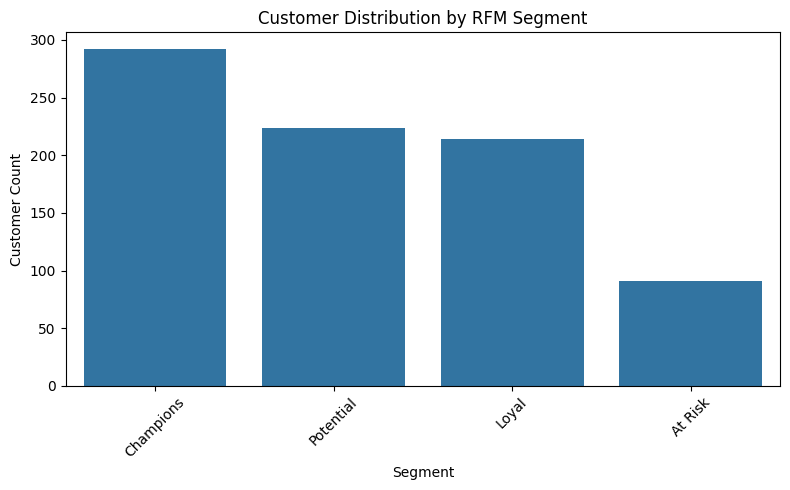

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of customers per segment
plt.figure(figsize=(8, 5))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index)
plt.title("Customer Distribution by RFM Segment")
plt.xlabel("Segment")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
def rfm_segment_map(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']

    if r == 5 and f == 5 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 4:
        return 'Loyal Customers'
    elif r == 5 and f >= 3:
        return 'Potential Loyalists'
    elif r <= 2 and f >= 3:
        return 'At Risk'
    elif r <= 2 and f <= 2:
        return 'Hibernating'
    elif r == 1 and f == 1:
        return 'Lost'
    elif m == 5 and r <= 3:
        return 'Big Spenders'
    elif r <= 3 and f == 3:
        return 'Need Attention'
    else:
        return 'Others'

# Apply segmentation
rfm['RFM_Interpretation'] = rfm.apply(rfm_segment_map, axis=1)




In [83]:
def define_rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r == 5 and f >= 4 and m >= 4:
        return 'High-Value Customers'
    elif r >= 4 and f >= 4 and m >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f >= 3:
        return 'Potential Loyalists'
    elif r <= 2 and f >= 3:
        return 'At-Risk Customers'
    elif r == 5 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r == 1 and f <= 2 and m <= 2:
        return 'Lost Customers'
    else:
        return 'Others'


In [84]:
rfm['Customer Segment'] = rfm.apply(define_rfm_segment, axis=1)


In [85]:
import pandas as pd

# Drop rows with missing values in Recency (as they can't be segmented)
rfm = rfm.dropna(subset=['Recency'])

# Ensure Monetary is positive for segmentation
rfm = rfm[rfm['Monetary'] > 0]

# Assign RFM Scores using Quartiles (1 = worst, 4 = best)
# Note: Recency is reverse-scored (lower recency is better)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Create RFM_Score as a string (e.g., '545') and RFM_Total as a sum (e.g., 14)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Total'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']


# Define customer segments
def define_rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r == 5 and f >= 4 and m >= 4:
        return 'High-Value Customers'
    elif r >= 4 and f >= 4 and m >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f >= 3:
        return 'Potential Loyalists'
    elif r <= 2 and f >= 3:
        return 'At-Risk Customers'
    elif r == 5 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r == 1 and f <= 2 and m <= 2:
        return 'Lost Customers'
    else:
        return 'Others'

# Assign customer segment
rfm['Customer Segment'] = rfm.apply(define_rfm_segment, axis=1)


# Preview first few rows
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment,RFM_Interpretation,Customer Segment,RFM_Total
0,12346.0,245.0,8,181.00,4,5,1,451,8,Loyal,Others,Potential Loyalists,10
1,12358.0,477.0,1,1429.83,3,1,5,315,8,Loyal,Others,Others,9
2,12359.0,569.0,2,800.81,2,3,4,234,8,Loyal,At Risk,At-Risk Customers,9
3,12362.0,689.0,1,130.00,1,1,1,111,3,At Risk,Hibernating,Lost Customers,3
4,12406.0,31.0,1,881.20,5,1,4,514,9,Champions,Others,Others,10


/tmp/ipython-input-86-3631945513.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Customer Segment',


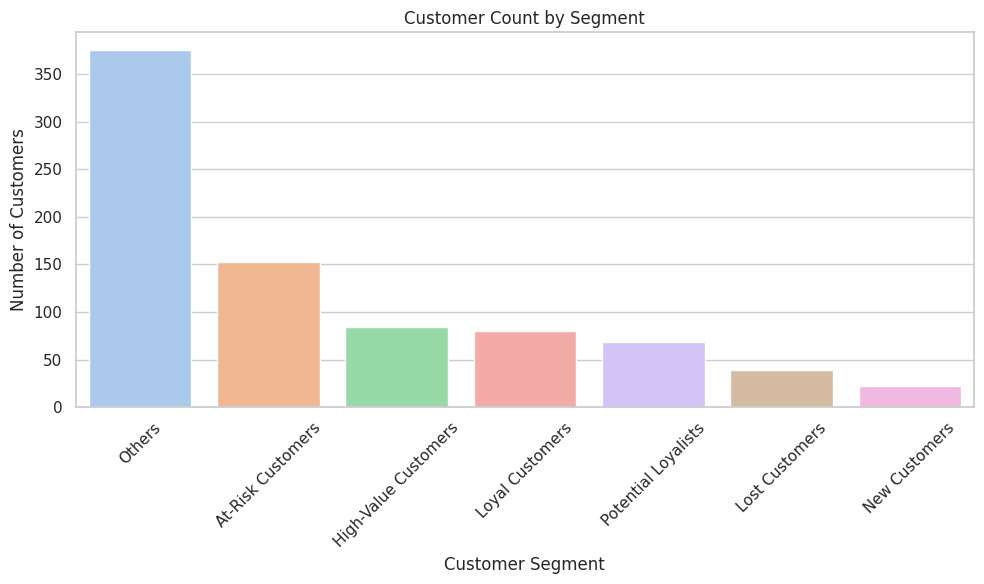

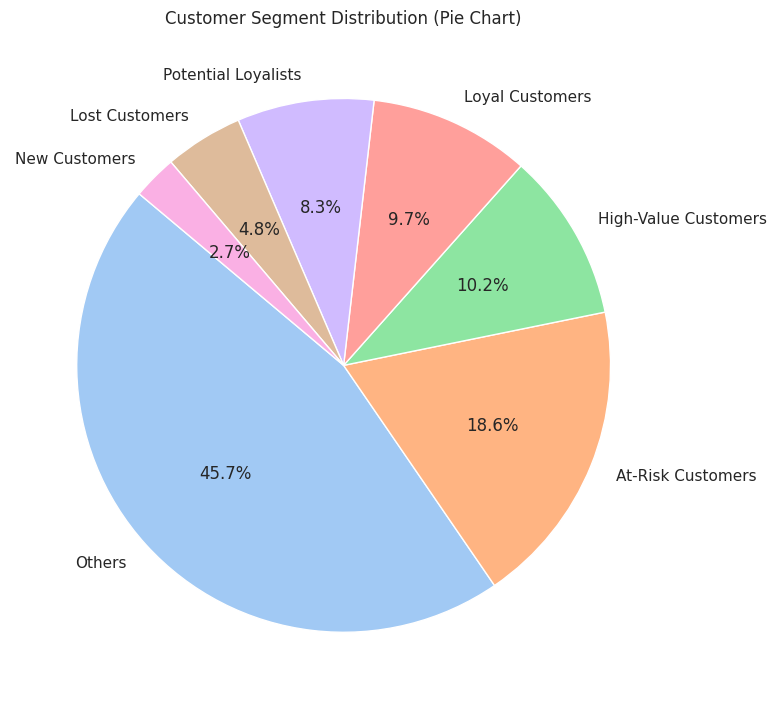

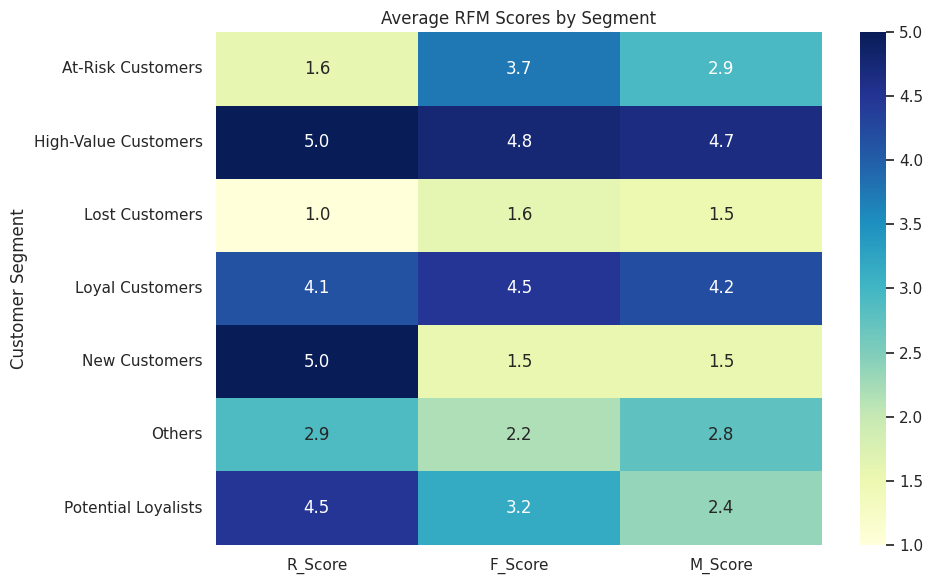

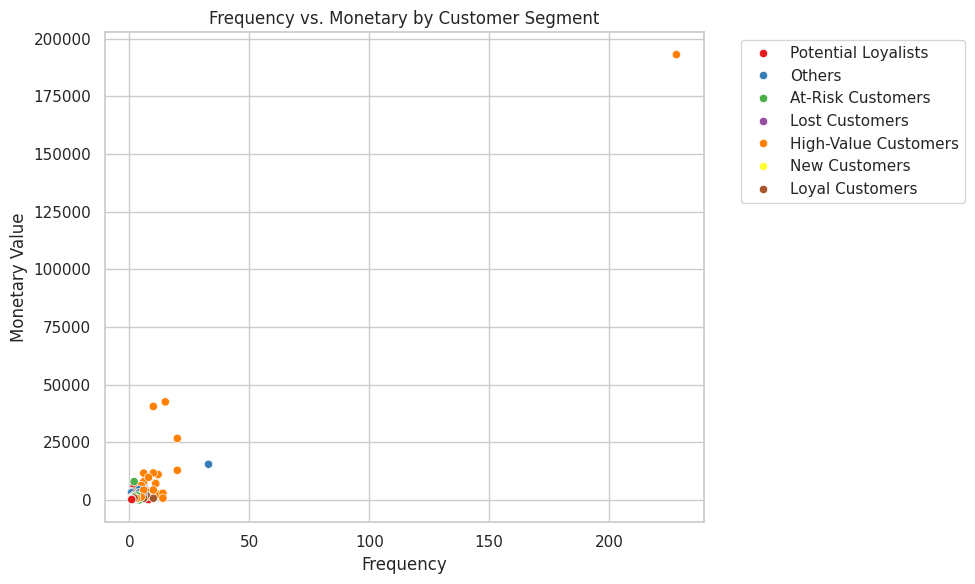

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set plot style
sns.set(style="whitegrid")

# ------------------------------
# 1️⃣ Bar Chart: Customer Count by Segment
# ------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Customer Segment',
              order=rfm['Customer Segment'].value_counts().index,
              palette='pastel')
plt.title('Customer Count by Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# ------------------------------
# 2️⃣ Pie Chart: Customer Distribution by Segment
# ------------------------------
segment_counts = rfm['Customer Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index,
        autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Customer Segment Distribution (Pie Chart)')
plt.tight_layout()

plt.show()

# ------------------------------
# 3️⃣ Heatmap: Average RFM Scores by Segment
# ------------------------------
avg_rfm_scores = rfm.groupby("Customer Segment")[["R_Score", "F_Score", "M_Score"]].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(avg_rfm_scores, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average RFM Scores by Segment")
plt.tight_layout()

plt.show()

# ------------------------------
# 4️⃣ Scatter Plot: Frequency vs. Monetary by Segment
# ------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Customer Segment', palette='Set1')
plt.title('Frequency vs. Monetary by Customer Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


/tmp/ipython-input-87-16753772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


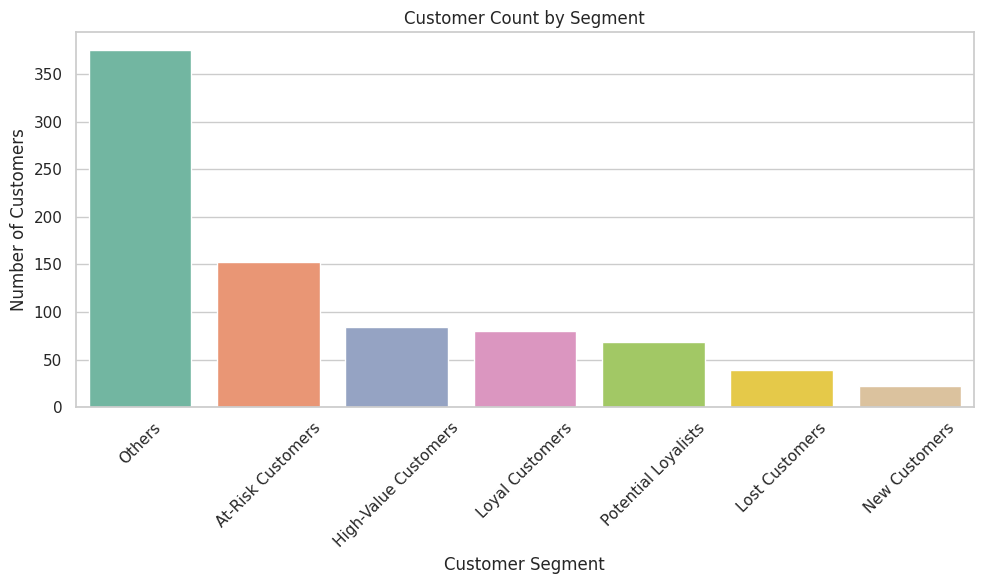

In [87]:
# Set the seaborn style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(
    data=rfm,
    x='Customer Segment',
    order=rfm['Customer Segment'].value_counts().index,  # Sort by count
    palette='Set2'
)

# Add chart details
plt.title('Customer Count by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

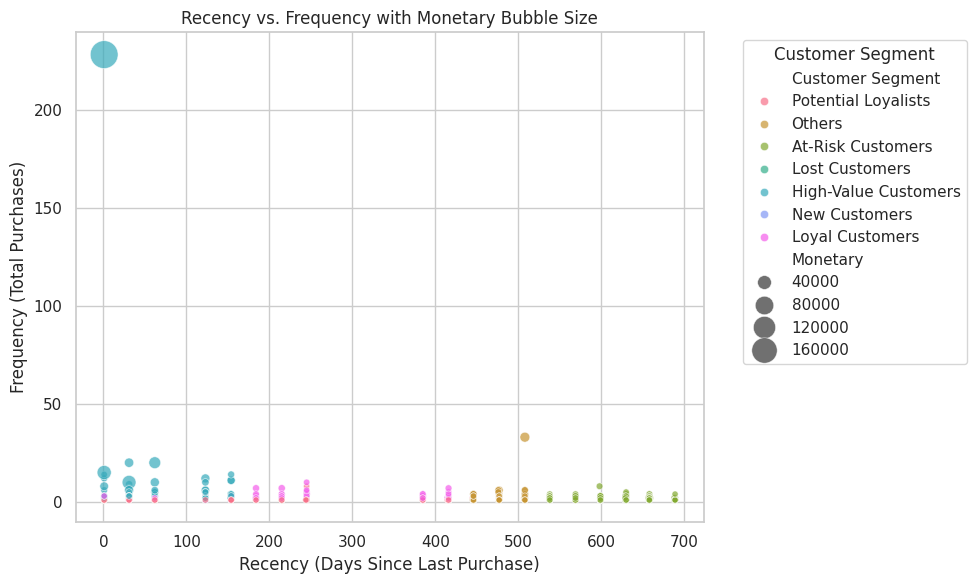

In [88]:
# Set seaborn style
sns.set(style="whitegrid")

# Create bubble chart (scatter plot with bubble size = Monetary value)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=rfm,
    x='Recency',
    y='Frequency',
    size='Monetary',
    hue='Customer Segment',
    palette='husl',
    sizes=(20, 400),
    alpha=0.7,
    edgecolor="w",
    linewidth=0.5
)

# Add labels and title
plt.title("Recency vs. Frequency with Monetary Bubble Size")
plt.xlabel("Recency (Days Since Last Purchase)")
plt.ylabel("Frequency (Total Purchases)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Customer Segment')
plt.tight_layout()


plt.show()

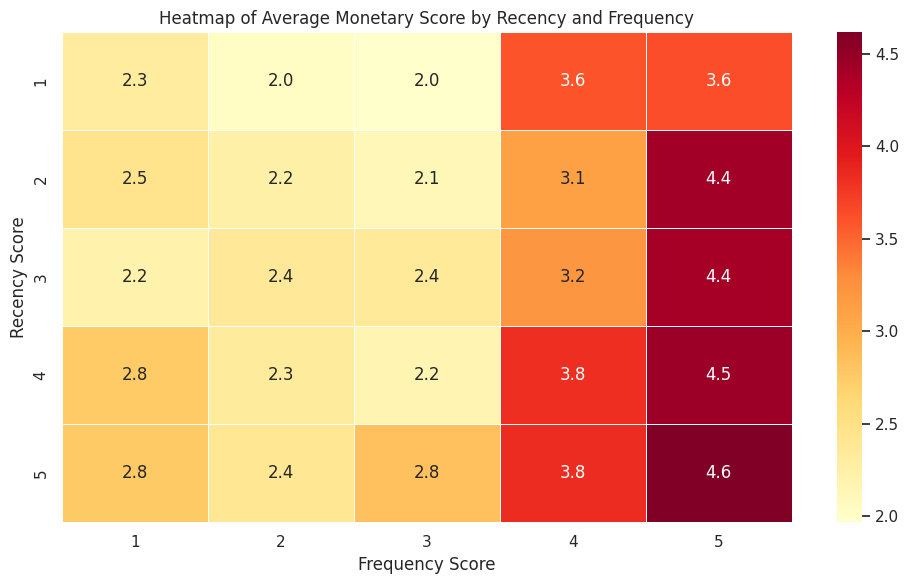

In [89]:
# Make sure R, F, M scores are numeric (if not already)
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Pivot the data to prepare for heatmap
# Average Monetary Score per R-F score combination
heatmap_data = rfm.pivot_table(
    index='R_Score',
    columns='F_Score',
    values='M_Score',
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',
    linewidths=0.5
)

# Add titles and labels
plt.title("Heatmap of Average Monetary Score by Recency and Frequency")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.tight_layout()


plt.show()

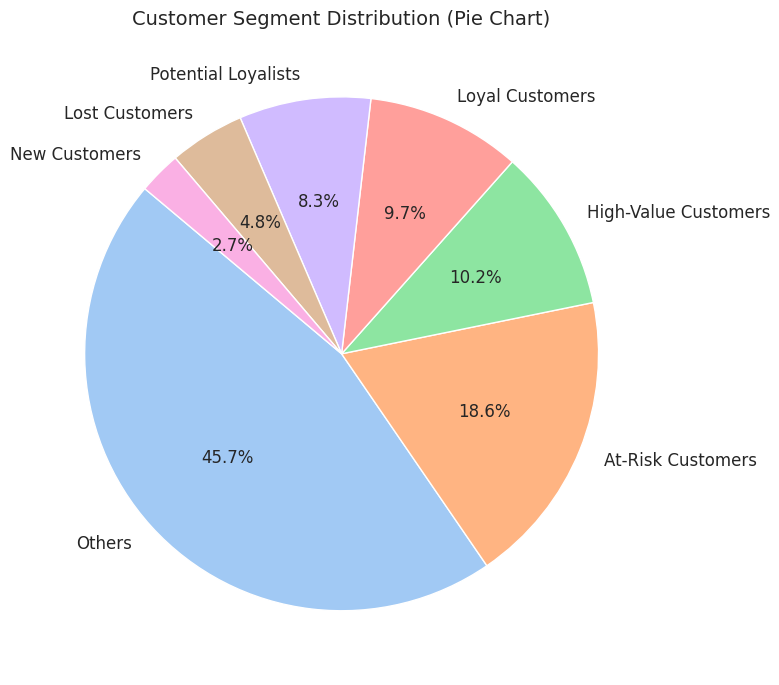

In [90]:
# Count number of customers in each segment
segment_counts = rfm['Customer Segment'].value_counts()

# Define colors using seaborn pastel palette
colors = sns.color_palette('pastel')[0:len(segment_counts)]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)
plt.title('Customer Segment Distribution (Pie Chart)', fontsize=14)
plt.tight_layout()


plt.show()

In [91]:
import pandas as pd
import numpy as np

# Aggregate RFM metrics per customer
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                       # Frequency
    'Revenue': 'sum'                                            # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Remove customers with negative or zero Monetary
rfm = rfm[rfm['Monetary'] > 0]

# Assign scores (1–5, higher is better)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Drop rows with any NaN values in the score columns before segmentation
rfm = rfm.dropna(subset=['R_score', 'F_score', 'M_score'])

# Convert score columns to integer type
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm['M_score'] = rfm['M_score'].astype(int)


# Combine RFM scores into a single string
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Segment customers based on RFM_Score
def segment_customer(row):
    r, f, m = int(row['R_score']), int(row['F_score']), int(row['M_score'])
    if r >= 4 and f >= 4 and m >= 4:
        return 'High-Value'
    elif r >= 4 and f <= 2:
        return 'New'
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At-Risk'
    elif r == 1 and f == 1 and m == 1:
        return 'Lost'
    elif f >= 4:
        return 'Loyal'
    else:
        return 'Potential Loyalist'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
# Export updated dataset
rfm.to_csv('Updated_Customer_Segmentation_Dataset.csv', index=False)
print("✅ Dataset updated and saved as 'Updated_Customer_Segmentation_Dataset.csv'")

✅ Dataset updated and saved as 'Updated_Customer_Segmentation_Dataset.csv'


In [92]:
# -------------------------------
# 📅 DAILY SALES AGGREGATION
# -------------------------------
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum().reset_index()
daily_sales.columns = ['Date', 'TotalRevenue']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# -------------------------------
# 📆 MONTHLY SALES AGGREGATION
# -------------------------------
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum().reset_index()
monthly_sales.columns = ['Month', 'TotalRevenue']
monthly_sales['Month'] = monthly_sales['Month'].astype(str)


In [93]:
# Convert 'Date' to datetime
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Create complete daily date range
full_dates = pd.date_range(start=daily_sales['Date'].min(), end=daily_sales['Date'].max(), freq='D')

# Reindex the data to include all dates
# Fill missing TotalRevenue with 0 (or use interpolation/mean if preferred)
daily_sales = daily_sales.set_index('Date').reindex(full_dates, fill_value=0)

# Rename index back to 'Date' and reset index
daily_sales.index.name = 'Date'
daily_sales = daily_sales.reset_index()
daily_sales.to_csv("filled_daily_sales.csv", index=False)

print("✅ Missing dates filled. File saved as 'filled_daily_sales.csv'")

✅ Missing dates filled. File saved as 'filled_daily_sales.csv'


/tmp/ipython-input-94-1701073729.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['TotalRevenue'].resample('M').sum()
/tmp/ipython-input-94-1701073729.py:32: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-94-1701073729.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-94-1701073729.py:32: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

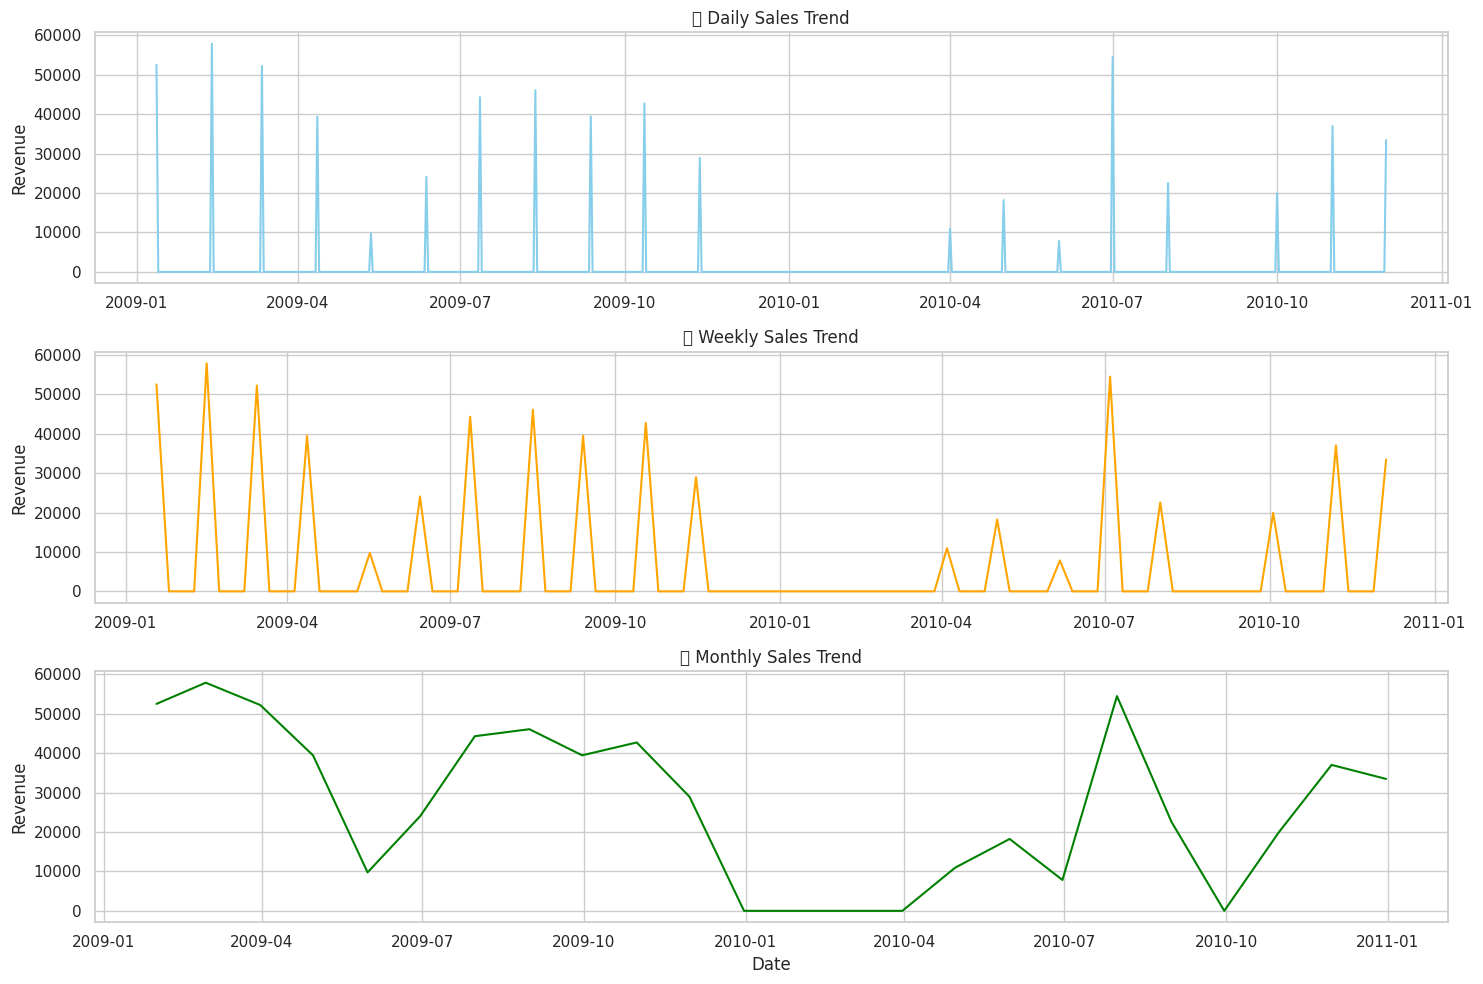

In [94]:
# Step 1: Load your cleaned and filled daily sales data
df = pd.read_csv("filled_daily_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Resample data for trend analysis
weekly_sales = df['TotalRevenue'].resample('W').sum()
monthly_sales = df['TotalRevenue'].resample('M').sum()

# Step 3: Plot daily, weekly, and monthly trends
plt.figure(figsize=(15, 10))

# Daily trend
plt.subplot(3, 1, 1)
plt.plot(df.index, df['TotalRevenue'], label="Daily Sales", color='skyblue')
plt.title("📅 Daily Sales Trend")
plt.ylabel("Revenue")

# Weekly trend
plt.subplot(3, 1, 2)
plt.plot(weekly_sales.index, weekly_sales.values, label="Weekly Sales", color='orange')
plt.title("📈 Weekly Sales Trend")
plt.ylabel("Revenue")

# Monthly trend
plt.subplot(3, 1, 3)
plt.plot(monthly_sales.index, monthly_sales.values, label="Monthly Sales", color='green')
plt.title("📆 Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")

plt.tight_layout()
plt.show()

In [95]:
# The 'Date' column is already the index after reading the CSV in the previous cell
# df['Date'] = pd.to_datetime(df['Date']) # This line is no longer needed

# Sort the dataset by date in ascending order (already sorted by index)
# df = df.sort_values(by='Date') # This line is no longer needed

# Set 'Date' as the index (already set in the previous cell)
# df.set_index('Date', inplace=True) # This line is no longer needed

# Save the updated dataset
df.to_csv("final_timeseries_sales_data.csv")

print("✅ Dataset sorted and indexed. Saved as 'final_timeseries_sales_data.csv'")

✅ Dataset sorted and indexed. Saved as 'final_timeseries_sales_data.csv'


In [96]:
import pandas as pd

# Load your prepared dataset
df = pd.read_csv('/content/updated_ecommerce_data.csv', parse_dates=['InvoiceDate'])

# Ensure data is sorted by date
df = df.sort_values('InvoiceDate')

# Set the date as the index (for time series analysis)
df.set_index('InvoiceDate', inplace=True)

# Optionally, aggregate sales by day if not already
daily_sales = df['Revenue'].resample('D').sum()

# Split 80% for training, 20% for testing
split_index = int(len(daily_sales) * 0.8)

train = daily_sales[:split_index]
test = daily_sales[split_index:]

# Preview the split
print("Training period:", train.index.min(), "to", train.index.max())
print("Testing period:", test.index.min(), "to", test.index.max())

Training period: 2009-01-12 00:00:00 to 2010-07-16 00:00:00
Testing period: 2010-07-17 00:00:00 to 2010-12-01 00:00:00


In [97]:
pip install prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/r35zdkr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/o24aplix.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73014', 'data', 'file=/tmp/tmp7u0wummx/r35zdkr4.json', 'init=/tmp/tmp7u0wummx/o24aplix.json', 'output', 'file=/tmp/tmp7u0wummx/prophet_modell5wv8pto/prophet_model-20250711160525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


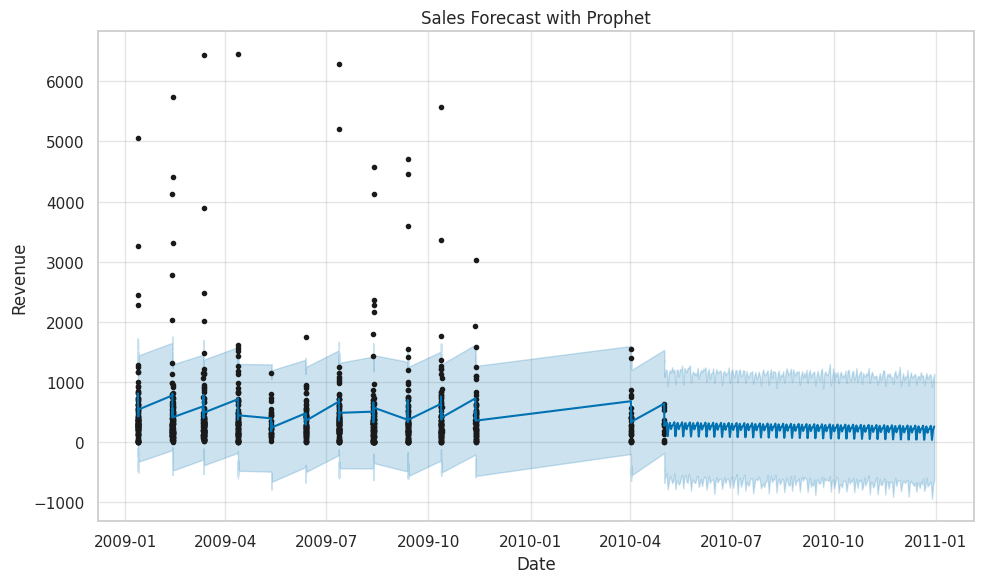

In [98]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and prepare your dataset
df = pd.read_csv('/content/updated_ecommerce_data.csv', parse_dates=['InvoiceDate'])
df = df[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
df = df.groupby('ds').sum().reset_index()

# Sort the data
df = df.sort_values('ds')

# Split into training and testing (80/20)
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Initialize Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)

# Optional: Add Indian festive holidays (Diwali, etc.)
holidays = pd.DataFrame({
    'holiday': 'diwali',
    'ds': pd.to_datetime(['2022-10-24', '2023-11-12', '2024-11-01']),  # Add actual Diwali dates
    'lower_window': 0,
    'upper_window': 2
})
model = Prophet(holidays=holidays)

# Fit the model on training data
model.fit(train)

# Create future dataframe (same length as test set)
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/bs2k4x64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/ulo_ukfg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70132', 'data', 'file=/tmp/tmp7u0wummx/bs2k4x64.json', 'init=/tmp/tmp7u0wummx/ulo_ukfg.json', 'output', 'file=/tmp/tmp7u0wummx/prophet_model08u0m5kg/prophet_model-20250711160526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE: 612.65
✅ MAPE: 17.24%


/tmp/ipython-input-99-678331179.py:45: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


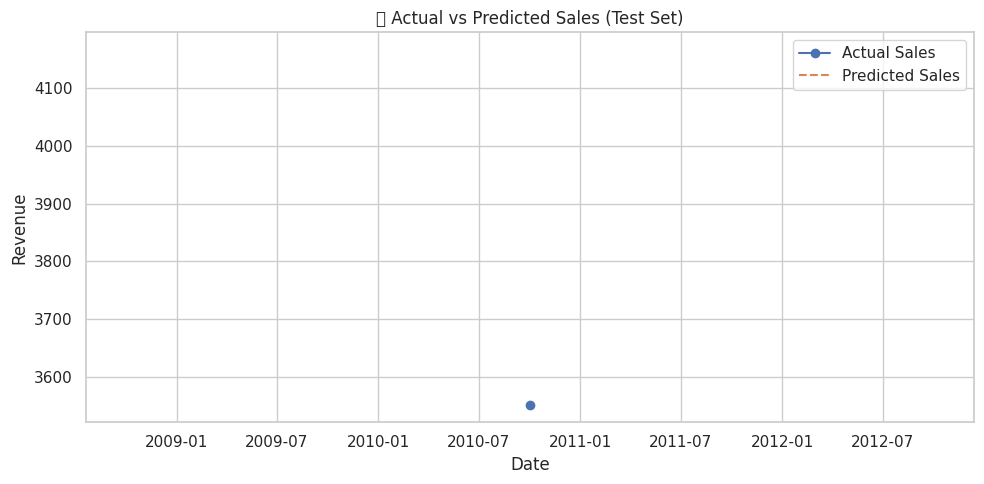

In [99]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and prepare dataset
df = pd.read_csv('/content/updated_ecommerce_data.csv', parse_dates=['InvoiceDate'])
df = df[['InvoiceDate', 'Revenue']].rename(columns={'InvoiceDate': 'ds', 'Revenue': 'y'})
df = df.groupby('ds').sum().reset_index().sort_values('ds')

# Step 2: Train-test split
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Step 3: Initialize and train Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(train)

# Step 4: Forecast future sales for test period + next 6 months
periods = len(test) + 180  # test + 6-month future
future = model.make_future_dataframe(periods=periods)
forecast = model.predict(future)

# Step 5: Merge forecast with actual test data for comparison
merged = forecast[['ds', 'yhat']].merge(test, on='ds', how='inner')

# Step 6: Evaluate prediction accuracy on test set
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
mape = mean_absolute_percentage_error(merged['y'], merged['yhat']) * 100

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAPE: {mape:.2f}%")

# Step 7: Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['y'], label='Actual Sales', marker='o')
plt.plot(merged['ds'], merged['yhat'], label='Predicted Sales', linestyle='--')
plt.title("📈 Actual vs Predicted Sales (Test Set)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-100-4271807538.py:13: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


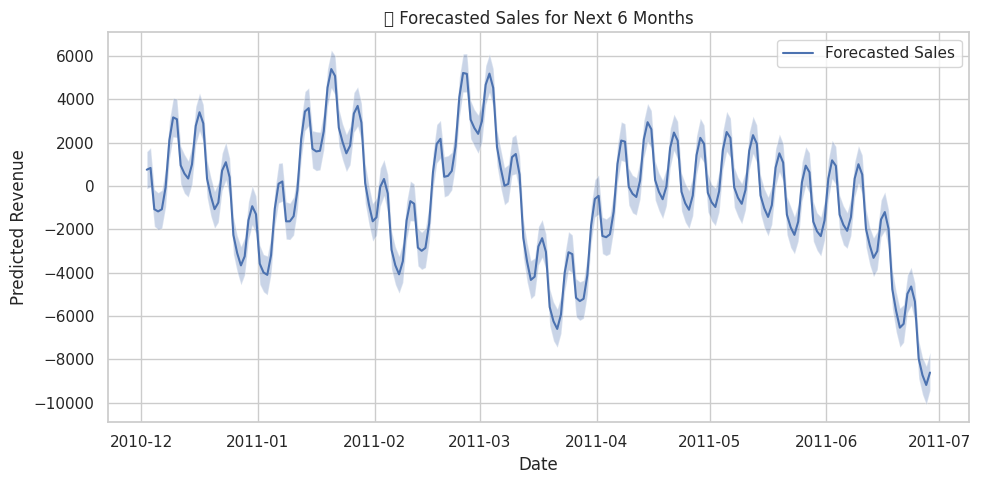

In [100]:
# Filter forecast for future dates only (after latest date in original dataset)
future_forecast = forecast[forecast['ds'] > df['ds'].max()]

# Plot future forecast
plt.figure(figsize=(10, 5))
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecasted Sales')
plt.fill_between(future_forecast['ds'], future_forecast['yhat_lower'], future_forecast['yhat_upper'], alpha=0.3)
plt.title("🔮 Forecasted Sales for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Predicted Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


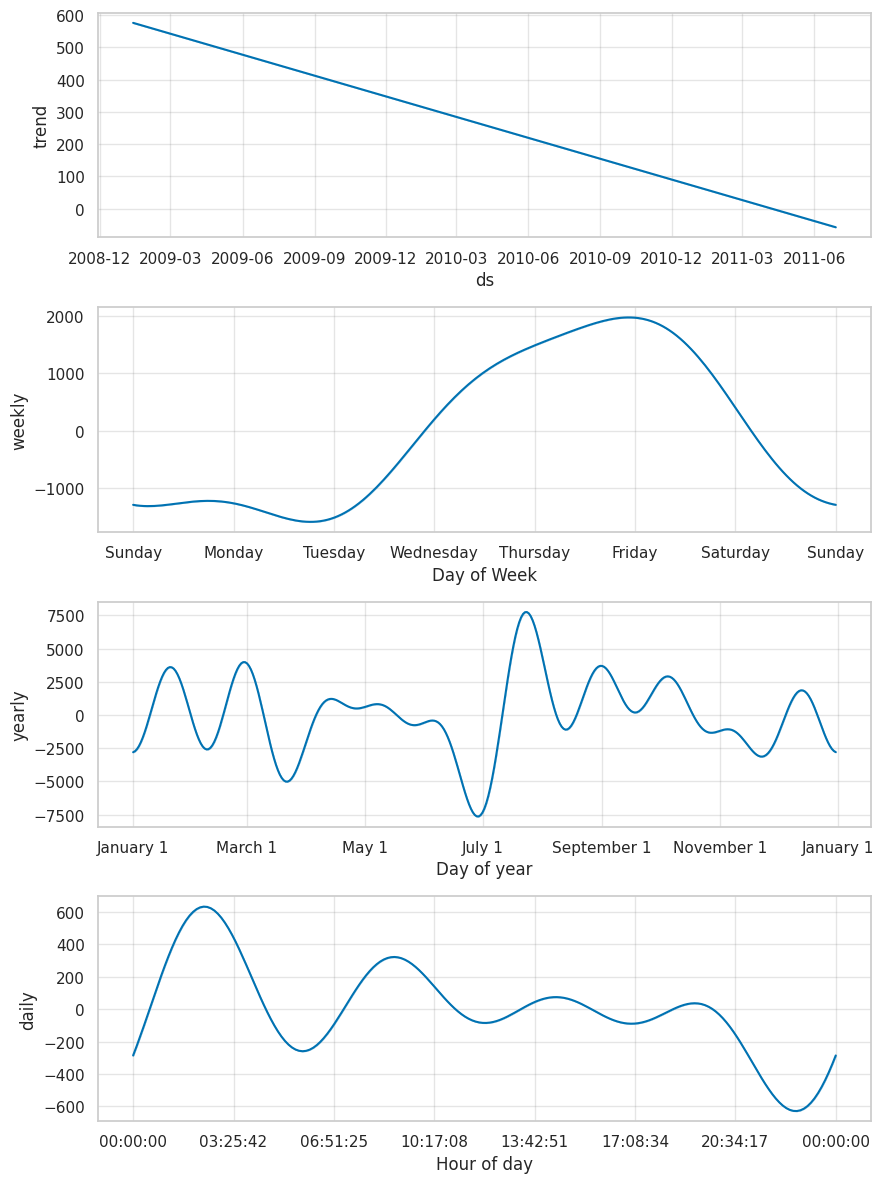

In [101]:
# Plot seasonal components using Prophet's built-in method
model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [102]:
# Already calculated earlier
print(f"Model RMSE: {rmse:.2f}")
print(f"Model MAPE: {mape:.2f}%")


Model RMSE: 612.65
Model MAPE: 17.24%


In [103]:
import pandas as pd

# Load your cleaned sales data
df = pd.read_csv("/content/updated_ecommerce_data.csv")

# Ensure 'InvoiceDate' is in datetime format and sort it
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.sort_values('InvoiceDate')

# Aggregate daily revenue
daily_sales = df.groupby('InvoiceDate').agg({'Revenue': 'sum'}).reset_index()
daily_sales.columns = ['ds', 'y']

In [104]:
from prophet import Prophet

# Initialize model with seasonalities
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Add Indian holidays/festivals manually (like Diwali)
holidays = pd.DataFrame({
    'holiday': ['diwali', 'new_year'],
    'ds': pd.to_datetime(['2023-11-12', '2024-01-01']),  # Add more dates if needed
    'lower_window': 0,
    'upper_window': 2
})
model = Prophet(holidays=holidays)
model.add_country_holidays(country_name='IN')  # Adds major Indian public holidays

# Fit the model
model.fit(daily_sales)


/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:182: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/x775syc4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/0zm7xy0k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73430', 'data', 'file=/tmp/tmp7u0wummx/x775syc4.json', 'init=/tmp/tmp7u0wummx/0zm7xy0k.json', 'output', 'file=/tmp/tmp7u0wummx/prophet_modelxukzla8g/prophet_model-20250711160529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO

In [105]:
# Forecast for the next 180 or 365 days
future = model.make_future_dataframe(periods=180)  # Change to 365 for 12 months
forecast = model.predict(future)


/tmp/ipython-input-106-685370769.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


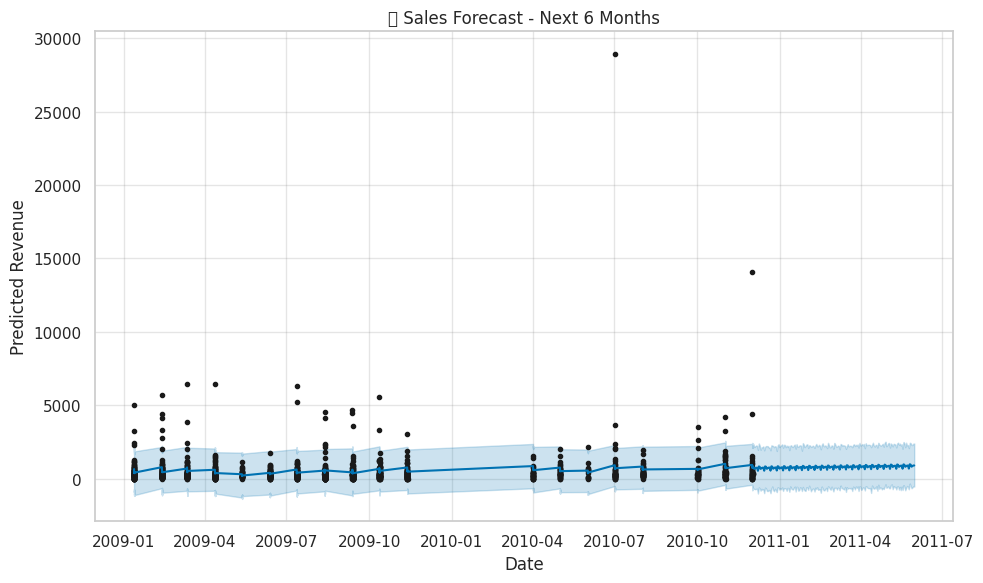

In [106]:
import matplotlib.pyplot as plt

# Plot forecast
fig1 = model.plot(forecast)
plt.title("📈 Sales Forecast - Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Predicted Revenue")
plt.tight_layout()
plt.show()


In [107]:
# Keep key forecast columns
output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
output.columns = ['Date', 'Predicted_Revenue', 'Lower_Bound', 'Upper_Bound']
output.to_csv("future_sales_forecast.csv", index=False)


In [108]:
pip install prophet pandas matplotlib


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/on4ow2gj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/s3kuvydl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=522', 'data', 'file=/tmp/tmp7u0wummx/on4ow2gj.json', 'init=/tmp/tmp7u0wummx/s3kuvydl.json', 'output', 'file=/tmp/tmp7u0wummx/prophet_model9355_cdm/prophet_model-20250711160542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


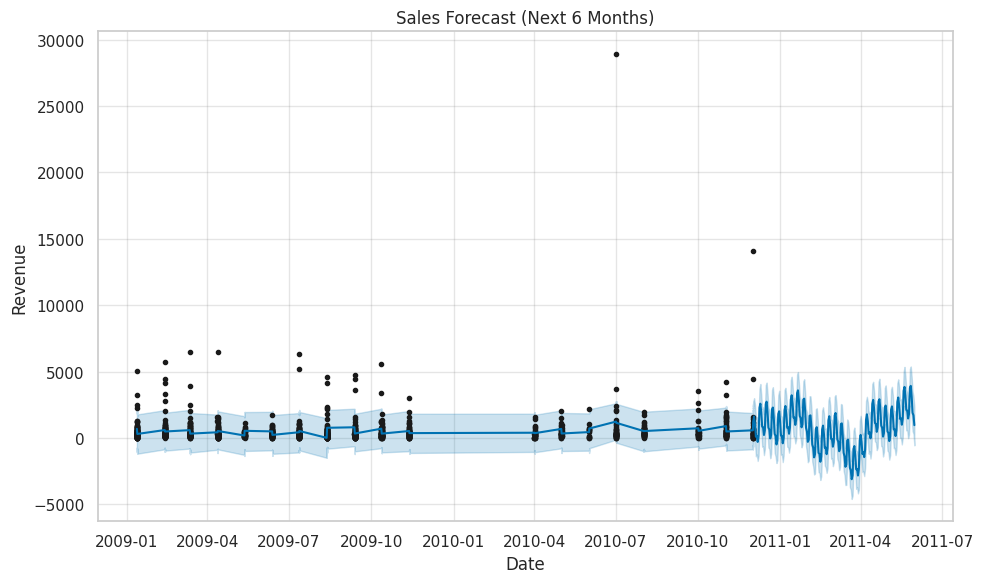

In [109]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/updated_ecommerce_data.csv")

# Convert order date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate revenue by day
daily_sales = df.groupby('InvoiceDate')['Revenue'].sum().reset_index()

# Rename columns for Prophet
daily_sales.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Fit the model
model.fit(daily_sales)

# Forecast for the next 6 months (180 days)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# Save forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("sales_forecast.csv", index=False)

In [110]:
pip install prophet scikit-learn pandas matplotlib


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/dbjaq8ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/1bkyabck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84916', 'data', 'file=/tmp/tmp7u0wummx/dbjaq8ey.json', 'init=/tmp/tmp7u0wummx/1bkyabck.json', 'output', 'file=/tmp/tmp7u0wummx/prophet_model0qnlhbve/prophet_model-20250711160553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


✅ RMSE: 4753.76
✅ MAPE: 2529.89%


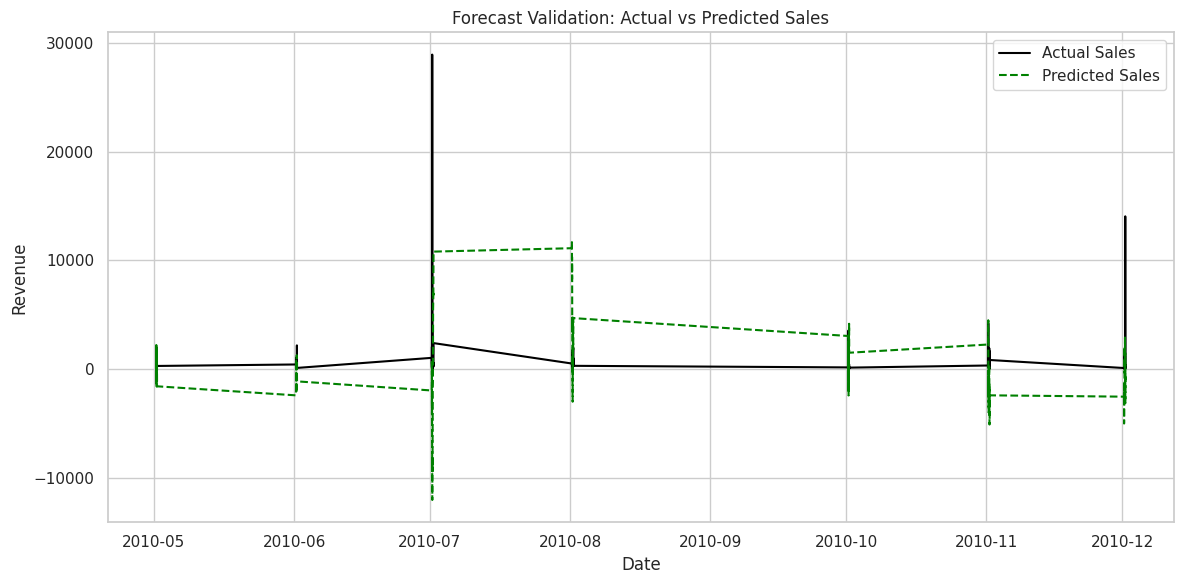

In [111]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Load your dataset
df = pd.read_csv("/content/updated_ecommerce_data.csv")

# Convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate daily sales
daily_sales = df.groupby('InvoiceDate')['Revenue'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

# Split into training and testing sets (80/20 split)
split_index = int(len(daily_sales) * 0.8)
train = daily_sales.iloc[:split_index]
test = daily_sales.iloc[split_index:]

# Train Prophet on the training data
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(train)

# Create future dataframe including test period
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Merge actual test data with forecast
merged = test.copy()
merged['yhat'] = forecast.iloc[-len(test):]['yhat'].values

# Calculate RMSE & MAPE
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
mape = mean_absolute_percentage_error(merged['y'], merged['yhat']) * 100

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAPE: {mape:.2f}%")

# plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(merged['ds'], merged['y'], label='Actual Sales', color='black')
plt.plot(merged['ds'], merged['yhat'], label='Predicted Sales', color='green', linestyle='--')
plt.title("Forecast Validation: Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
# Install prophet if not already installed
# !pip install prophet

import pandas as pd
from prophet import Prophet

# Load your time series data (ensure 'ds' and 'y' columns exist)
df = pd.read_csv("/content/cleaned_ecommerce_data.csv")  # replace with your actual file
df['ds'] = pd.to_datetime(df['InvoiceDate'])  # replace 'Date' with your actual date column name
df['y'] = df['Revenue']  # replace 'Revenue' with your actual sales column

# Drop rows with missing values in 'ds'
df.dropna(subset=['ds'], inplace=True)

# Fit the model
model = Prophet()
model.fit(df[['ds', 'y']])

# Forecast for next 12 months
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Save the relevant columns
output = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
output.columns = ['Date', 'Predicted_Sales', 'Lower_Bound', 'Upper_Bound']
output.to_csv("updated_forecast_dataset.csv", index=False)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/ju874iok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7u0wummx/lycxs1v6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33581', 'data', 'file=/tmp/tmp7u0wummx/ju874iok.json', 'init=/tmp/tmp7u0wummx/lycxs1v6.json', 'output', 'file=/tmp/tmp7u0wummx/prophet_modelvaxud_66/prophet_model-20250711160648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:06:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:06:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


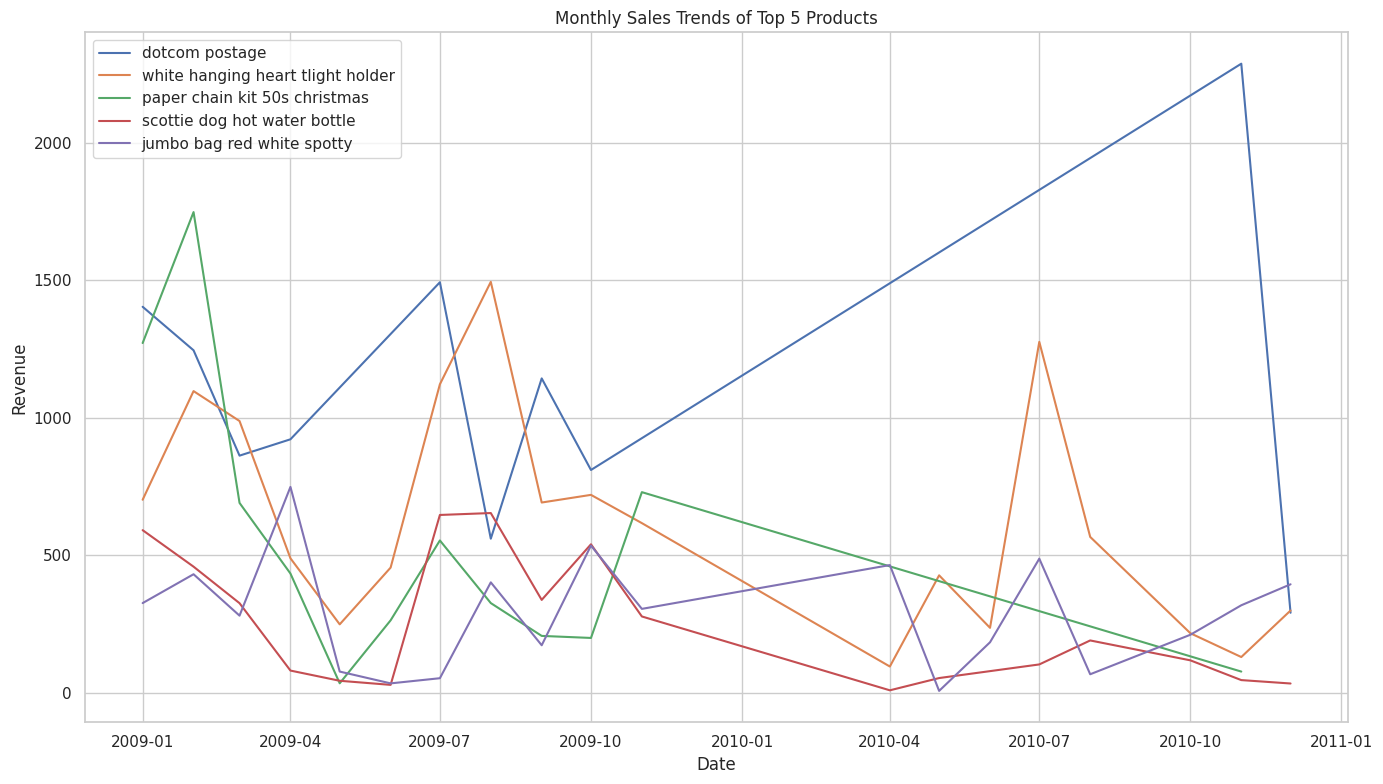

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path if needed)
df = pd.read_csv("/content/updated_ecommerce_data.csv", parse_dates=['InvoiceDate'])

# Ensure correct types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by Product and Month, and calculate revenue
product_monthly_sales = df.groupby(['Description', 'YearMonth'])['Revenue'].sum().reset_index()

# Convert YearMonth to datetime for plotting
product_monthly_sales['YearMonth'] = product_monthly_sales['YearMonth'].astype(str)
product_monthly_sales['YearMonth'] = pd.to_datetime(product_monthly_sales['YearMonth'])

# Identify Top 5 Products by Total Revenue
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter to top products only
top_product_sales = product_monthly_sales[product_monthly_sales['Description'].isin(top_products)]

# Plot Monthly Sales Trends of Top Products
plt.figure(figsize=(14, 8))
for product in top_products:
    data = top_product_sales[top_product_sales['Description'] == product]
    plt.plot(data['YearMonth'], data['Revenue'], label=product)

plt.title('Monthly Sales Trends of Top 5 Products')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
# Pivot the product-month revenue data
pivot = product_monthly_sales.pivot(index='YearMonth', columns='Description', values='Revenue')

# Calculate average growth rate (monthly)
growth = pivot.pct_change().mean().sort_values(ascending=False)

# Show top 5 growing products
print("Top 5 Fastest Growing Products by Avg. Monthly Growth Rate:")
print(growth.head(5))


Top 5 Fastest Growing Products by Avg. Monthly Growth Rate:
Description
manual                             27.024077
heart decoration painted zinc      18.443137
set6 pink  butterfly tlights       15.189934
pink heart shape egg frying pan    11.377784
retro spot  cigar box matches      10.527404
dtype: float64


/tmp/ipython-input-117-3775063595.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth = pivot.pct_change().mean().sort_values(ascending=False)


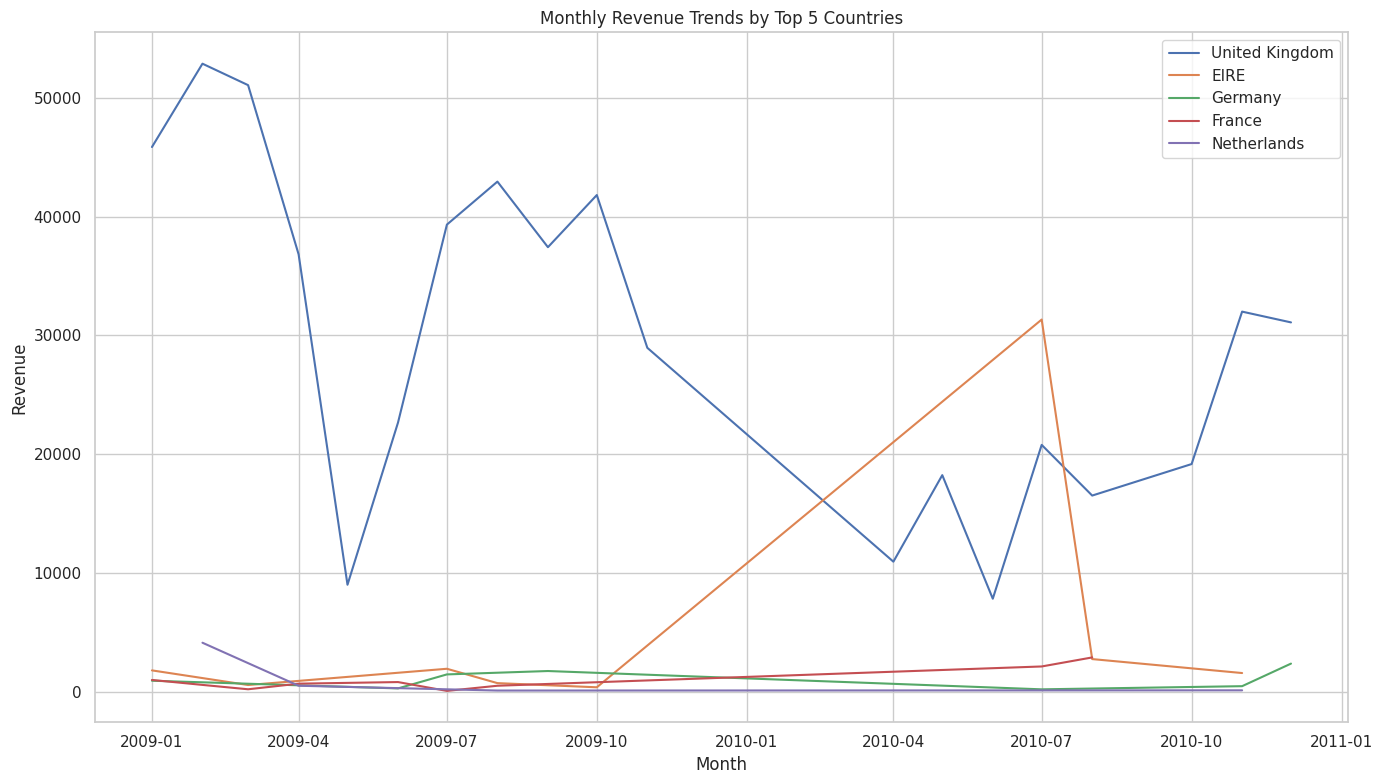

In [118]:
# Ensure datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].astype(str)

# Group by Country and Month, calculate revenue
regional_sales = df.groupby(['Country', 'YearMonth'])['Revenue'].sum().reset_index()

# Convert YearMonth to datetime
regional_sales['YearMonth'] = pd.to_datetime(regional_sales['YearMonth'])

# Identify Top 5 Countries by Total Revenue
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter data for top countries
top_country_sales = regional_sales[regional_sales['Country'].isin(top_countries)]

# Plot monthly revenue trend for top countries
plt.figure(figsize=(14, 8))
for country in top_countries:
    data = top_country_sales[top_country_sales['Country'] == country]
    plt.plot(data['YearMonth'], data['Revenue'], label=country)

plt.title("Monthly Revenue Trends by Top 5 Countries")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
# Pivot for easier growth analysis
pivot = regional_sales.pivot(index='YearMonth', columns='Country', values='Revenue')

# Calculate average monthly growth rate per country
growth_rates = pivot.pct_change().mean().sort_values(ascending=False)

# Display top 5 fastest growing regions
print("Top 5 Fastest Growing Countries (Monthly Growth Rate):")
print(growth_rates.head(5))


Top 5 Fastest Growing Countries (Monthly Growth Rate):
Country
EIRE       4.230519
Belgium    2.427124
France     0.478901
Germany    0.380268
USA        0.109410
dtype: float64


In [138]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load your cleaned ecommerce dataset
df = pd.read_csv("/content/updated_ecommerce_data.csv")

# Ensure date is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter out returns or invalid data (negative quantity)
df = df[df['Quantity'] > 0]

# Drop missing product descriptions
df = df.dropna(subset=['Description'])

# -------------------------------
# Step 1: Create Basket of Products Per Invoice
# -------------------------------
basket = (df.groupby(['Invoice', 'Description'])['Quantity']
            .sum().unstack().fillna(0))

# Convert quantities to binary (1 = purchased, 0 = not purchased)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# -------------------------------
# Step 2: Apply Apriori Algorithm
# -------------------------------
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Get association rules for cross-selling opportunities
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter strong rules
strong_rules = rules[(rules['confidence'] > 0.5) & (rules['lift'] > 1.1)]

# Sort by lift
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

# Display top 10 product pairings
print("Top Cross-Selling Product Pairings:")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

/tmp/ipython-input-138-4254841339.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)


Top Cross-Selling Product Pairings:
                              antecedents  \
343                  (suki  shoulder bag)   
342                  (skull shoulder bag)   
268    (pink blue felt craft trinket box)   
269   (pink cream felt craft trinket box)   
38    (red 3 piece mini dots cutlery set)   
39   (blue 3 piece mini dots cutlery set)   
37   (blue 3 piece mini dots cutlery set)   
36   (pink 3 piece mini dots cutlery set)   
99                (edwardian parasol red)   
98            (edwardian parasol natural)   

                              consequents   support  confidence       lift  
343                  (skull shoulder bag)  0.023108    0.586207  19.602403  
342                  (suki  shoulder bag)  0.023108    0.772727  19.602403  
268   (pink cream felt craft trinket box)  0.020843    0.647887  19.065164  
269    (pink blue felt craft trinket box)  0.020843    0.613333  19.065164  
38   (blue 3 piece mini dots cutlery set)  0.021749    0.623377  18.846469  
39    

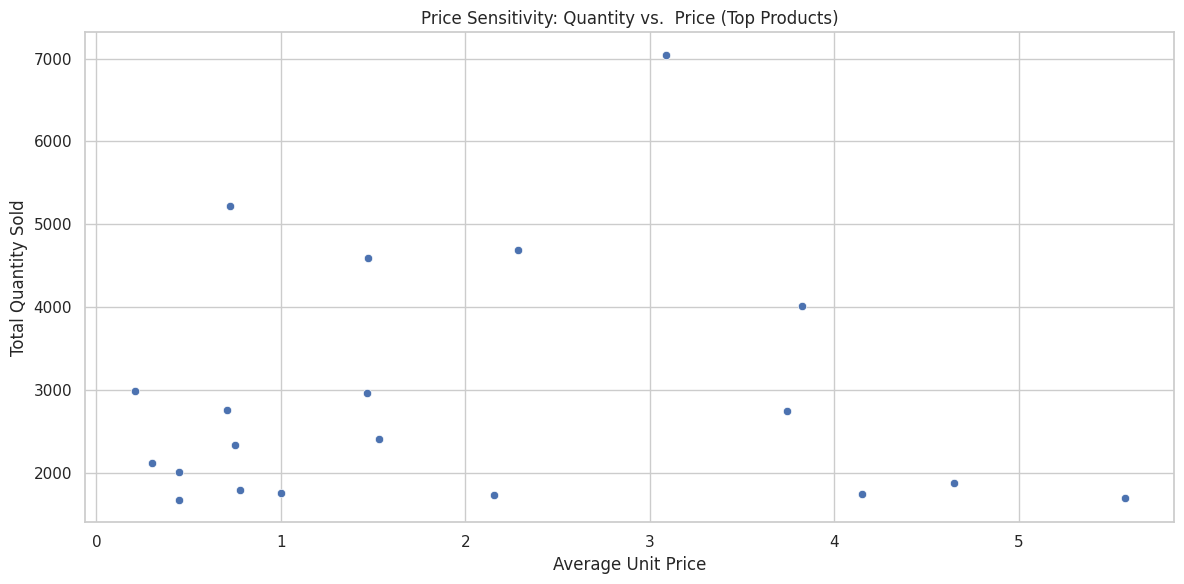

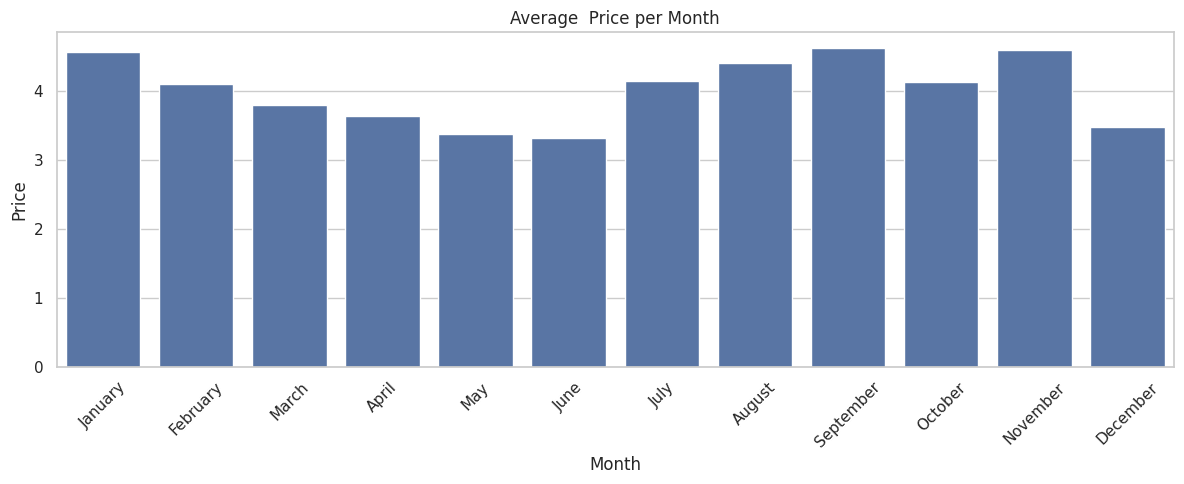

No 'Discount' column found — skipping promotion impact plot.


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove returns (negative quantities or prices)
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Create revenue column
df['Revenue'] = df['Quantity'] * df['Price']

# ----------------------------
# 1️⃣ Analyze Price Sensitivity
# ----------------------------
# Group by product to evaluate price vs. quantity correlation
price_sensitivity = df.groupby('Description').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Filter top-selling products
top_products = price_sensitivity.sort_values(by='Quantity', ascending=False).head(20)

# Visualize quantity vs price (price sensitivity)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_products, x='Price', y='Quantity')
plt.title('Price Sensitivity: Quantity vs.  Price (Top Products)')
plt.xlabel('Average Unit Price')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 2️⃣ Identify Seasonal Price Impact
# ----------------------------
# Extract month
df['Month'] = df['InvoiceDate'].dt.month_name()

# Group by month and average unit price
monthly_price_trends = df.groupby('Month')['Price'].mean().reset_index()

# Plot average price per month
plt.figure(figsize=(12, 5))
sns.barplot(data=monthly_price_trends, x='Month', y='Price', order=[
    'January','February','March','April','May','June','July',
    'August','September','October','November','December'])
plt.xticks(rotation=45)
plt.title('Average  Price per Month')
plt.ylabel('Price')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# ----------------------------
# 3️⃣ Analyze Promotion Effect (Optional)
# ----------------------------
# If 'Discount' column exists
if 'Discount' in df.columns:
    df['EffectivePrice'] = df['Price'] * (1 - df['Discount'])

    promo_effect = df.groupby('Discount').agg({
        'Revenue': 'sum',
        'InvoiceNo': 'nunique'
    }).reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=promo_effect, x='Discount', y='Revenue', marker='o')
    plt.title('Promotion Impact on Revenue')
    plt.xlabel('Discount %')
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()
else:
    print("No 'Discount' column found — skipping promotion impact plot.")


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load RFM segmented data
rfm_df = pd.read_csv("/content/Updated_Customer_Segmentation_Dataset.csv")

# Preview the data
print(rfm_df.head())


   CustomerID  Recency  Frequency  Monetary  R_score  F_score  M_score  \
0     12346.0    244.0          8    181.00        4        5        2   
1     12358.0    476.0          1   1429.83        3        1        5   
2     12359.0    568.0          2    800.81        2        4        4   
3     12362.0    688.0          1    130.00        1        1        1   
4     12406.0     30.0          1    881.20        5        1        5   

   RFM_Score             Segment  
0        452               Loyal  
1        315  Potential Loyalist  
2        244             At-Risk  
3        111                Lost  
4        515                 New  


/tmp/ipython-input-144-4149810682.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='Segment', y='CustomerCount', palette='Set2')


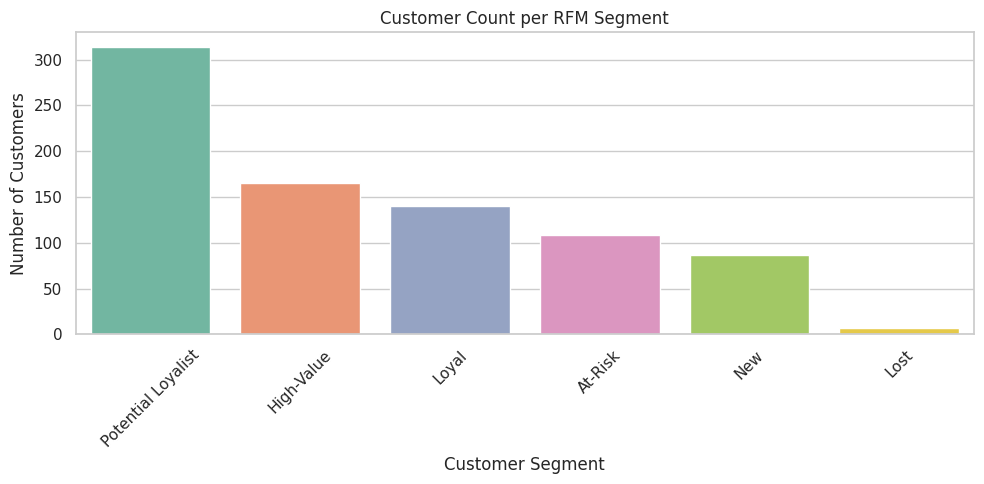

In [144]:
# Count customers by segment
segment_counts = rfm_df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'CustomerCount']

# Bar chart to visualize segment sizes
plt.figure(figsize=(10, 5))
sns.barplot(data=segment_counts, x='Segment', y='CustomerCount', palette='Set2')
plt.xticks(rotation=45)
plt.title("Customer Count per RFM Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


In [145]:
# Identify segments that need re-engagement
at_risk_segments = ['At-Risk', 'Lost']
loyal_segments = ['High-Value', 'Loyal Customers']

# Filter data for each group
at_risk_customers = rfm_df[rfm_df['Segment'].isin(at_risk_segments)]
loyal_customers = rfm_df[rfm_df['Segment'].isin(loyal_segments)]

# Print summary
print("🔁 At-Risk Customers:")
print(at_risk_customers.describe())

print("\n⭐ Loyal Customers:")
print(loyal_customers.describe())


🔁 At-Risk Customers:
         CustomerID     Recency   Frequency     Monetary     R_score  \
count    115.000000  115.000000  115.000000   115.000000  115.000000   
mean   15756.026087  630.156522    1.991304   756.799043    1.547826   
std     1669.693692   49.076130    1.047098   818.882033    0.499886   
min    12359.000000  537.000000    1.000000    12.750000    1.000000   
25%    14383.000000  598.000000    1.000000   407.125000    1.000000   
50%    16159.000000  629.000000    2.000000   558.950000    2.000000   
75%    17155.000000  672.000000    2.000000   829.845000    2.000000   
max    18229.000000  688.000000    8.000000  7986.290000    2.000000   

          F_score     M_score   RFM_Score  
count  115.000000  115.000000  115.000000  
mean     3.913043    3.782609  197.695652  
std      1.072505    1.015517   54.055880  
min      1.000000    1.000000  111.000000  
25%      3.000000    3.000000  144.000000  
50%      4.000000    4.000000  233.000000  
75%      5.000000    4